# MetaNeuralNetwork

In [86]:
from NeuralNetwork import NeuralNetwork as nn
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import our NeuralNetwork created last week

In [87]:
class MetaNeuralNetwork:
    def __init__(self, params):
        self.basic_neural_struct = params["size"]
        self.auth_activations = params["activation"]
        self.min_learning_rate = params["min_learning_rate"]
        self.max_learning_rate = params["max_learning_rate"]
        self.min_epoch = params["min_epoch"]
        self.max_epoch = params["max_epoch"]
        self.derivate_structure = params["derivate_structure"]
        self.min_layer_size = params["min_layer_derivate"]
        self.max_layer_size = params["max_layer_derivate"]
        self.meta_epoch = params["meta_epoch"]
        self.data = []
    
    def mount_new_neural_network(self):
        meta_struct_activation = ["input", "sigmoid"]
        meta_size = self.basic_neural_struct
        meta_derivate = random.randint(0, self.derivate_structure)
        meta_learning = random.uniform(self.min_learning_rate, self.max_learning_rate)
        
        for _ in range(meta_derivate):
            meta_index_size = len(self.basic_neural_struct) - 1
            meta_size = np.insert(meta_size, meta_index_size, random.randint(self.min_layer_size, self.max_layer_size))
            meta_struct_activation.insert(meta_index_size, self.auth_activations[random.randint(0, len(self.auth_activations) - 1)])
        return nn(
            {
                "size": meta_size,
                "activation": meta_struct_activation,
                "learning_rate": meta_learning
            }
        )
    
    def get_best_neural(self):
        ba = 0.0
        index = -1
        
        for _ in range(len(self.data)):
            if (np.mean(self.data[_]["NeuralNetwork"].accurency) > ba):
                ba = np.mean(self.data[_]["NeuralNetwork"].accurency)
                index = _
        return (self.data[index])
    
    def print_current_process(self, neural, _):
        if (_ % 10 == 0):
            print("Process " + str((_/self.meta_epoch)*100)+" %")
            print("Best Accurency "+ str(np.mean(self.get_best_neural()["NeuralNetwork"].accurency)*100) + " %")
            print("Actual Accurency "+ str(np.mean(neural.accurency)*100) + " %\n")
    
    def search(self, minput, moutput):
        for _ in range(self.meta_epoch):
            
            epoch = random.randint(self.min_epoch, self.max_epoch)
            neural = self.mount_new_neural_network()
            neural.train(np.array(minput, dtype=np.float64).T, np.array(moutput, dtype=np.float64).T, epoch)
            self.data.append(
                {
                    "NeuralNetwork": neural,
                    "Epoch": epoch,
                }
            )
            plt.figure(_ * 2)
            plt.plot(range(0, epoch), neural.losses, label="Loss")
            plt.plot(range(0, epoch), neural.cost, label="Cost")
            plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
            plt.figure(_ * 2 + 1)
            plt.plot(range(0, epoch), neural.accurency, label="Accurency")
            plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
            self.print_current_process(neural, _)
        plt.show()
        

Process 0.0 %
Best Accurency 93.36522711772484 %
Actual Accurency 93.36522711772484 %

Process 5.0 %
Best Accurency 93.36522711772484 %
Actual Accurency nan %

Process 10.0 %
Best Accurency 94.38762513513545 %
Actual Accurency 76.50560340603947 %

Process 15.0 %
Best Accurency 94.38762513513545 %
Actual Accurency 92.38911576874128 %

Process 20.0 %
Best Accurency 95.28480120743438 %
Actual Accurency 75.94357821590613 %

Process 25.0 %
Best Accurency 97.52589948420153 %
Actual Accurency 79.27659482775549 %

Process 30.0 %
Best Accurency 98.82980151451028 %
Actual Accurency 98.82980151451028 %

Process 35.0 %
Best Accurency 98.82980151451028 %
Actual Accurency 87.08172270334323 %

Process 40.0 %
Best Accurency 98.82980151451028 %
Actual Accurency 95.91613098578722 %

Process 45.0 %
Best Accurency 99.97028037309987 %
Actual Accurency 84.26526393033942 %

Process 50.0 %
Best Accurency 99.97028037309987 %
Actual Accurency 68.62414450206515 %

Process 55.00000000000001 %
Best Accurency 99.97

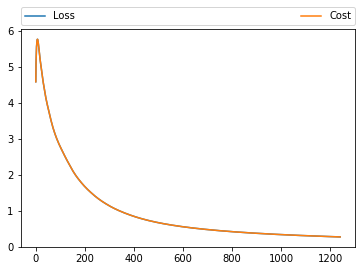

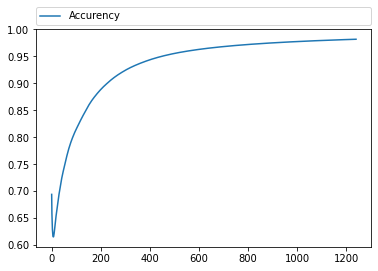

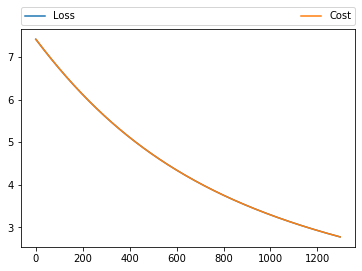

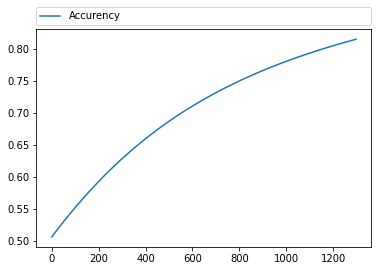

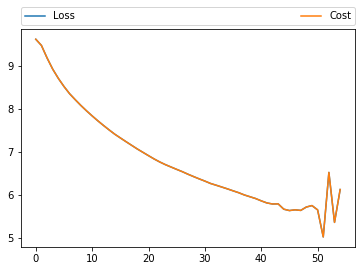

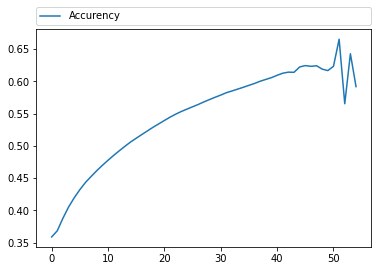

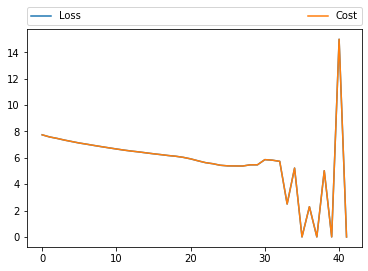

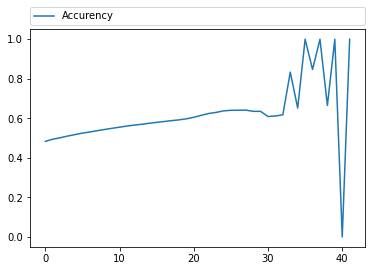

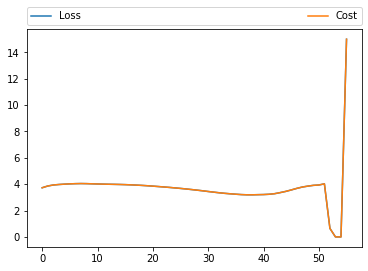

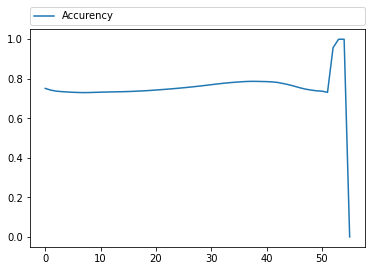

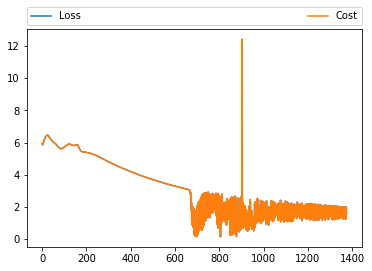

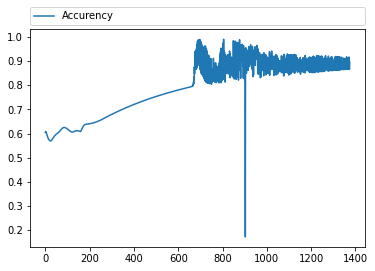

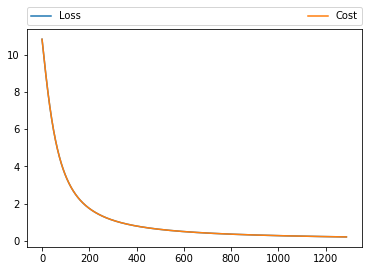

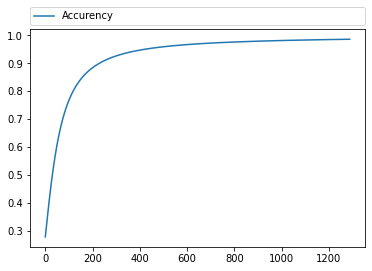

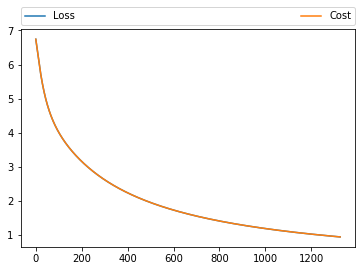

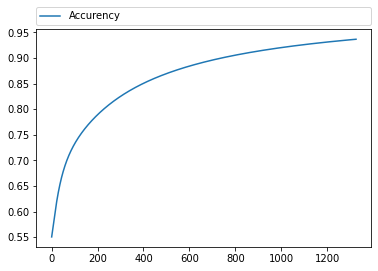

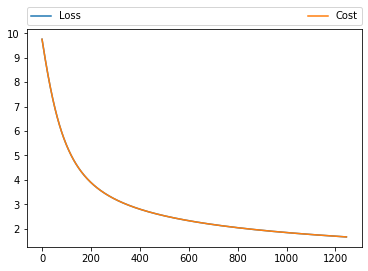

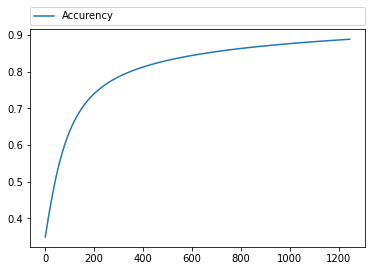

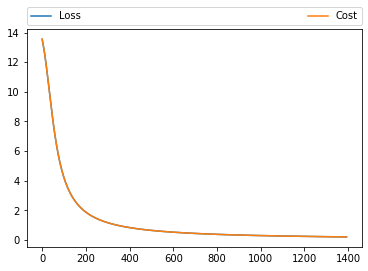

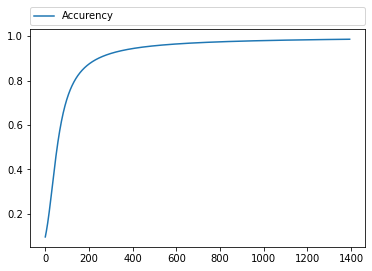

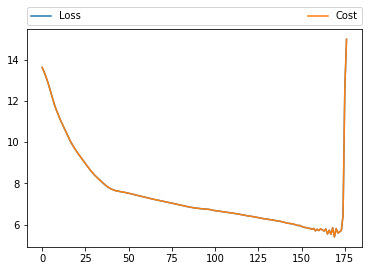

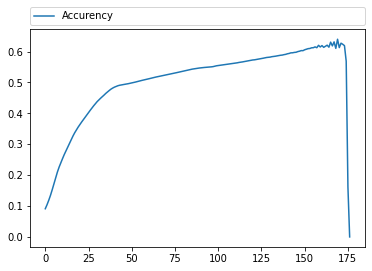

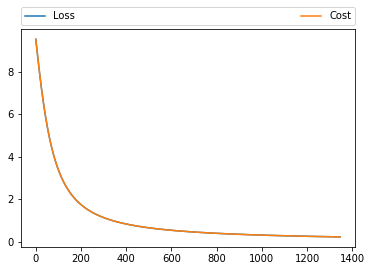

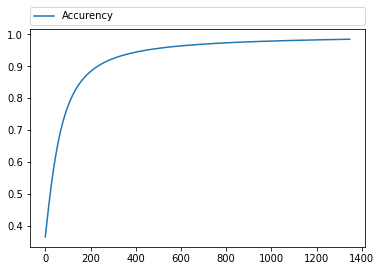

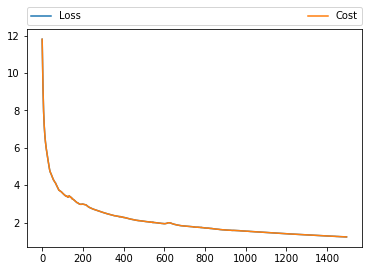

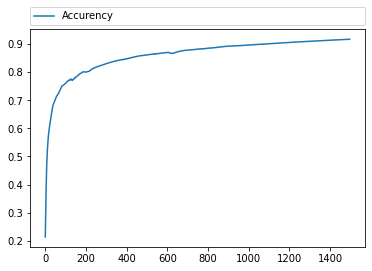

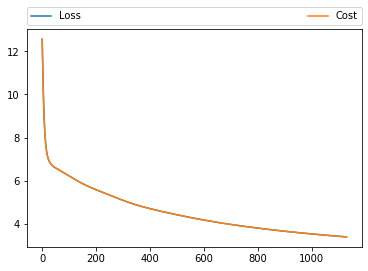

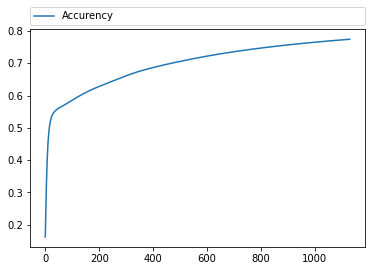

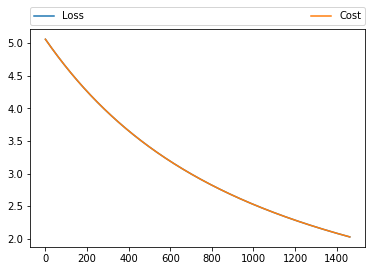

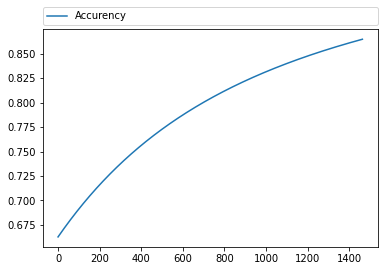

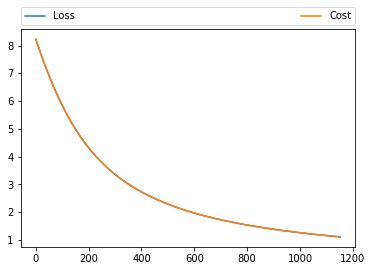

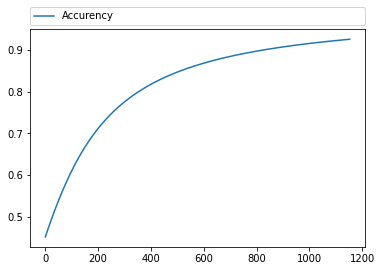

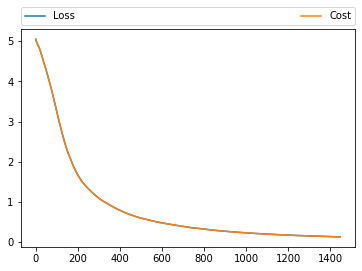

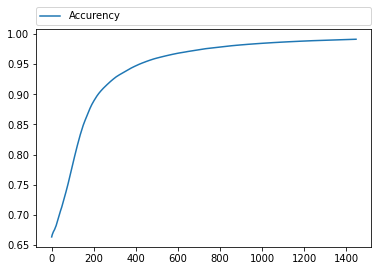

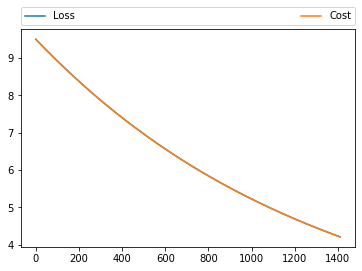

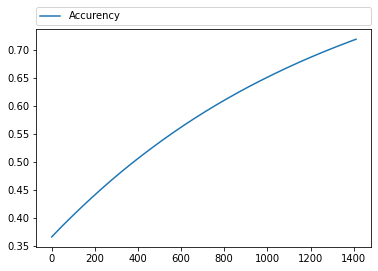

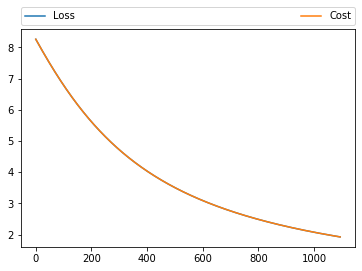

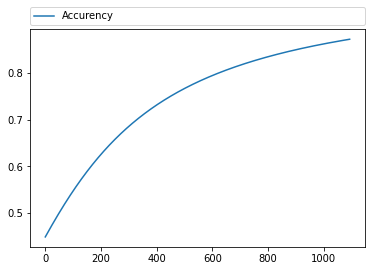

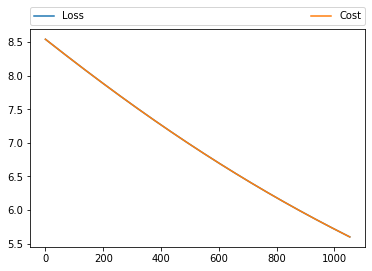

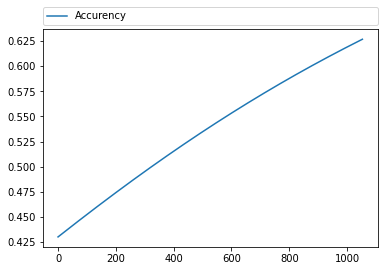

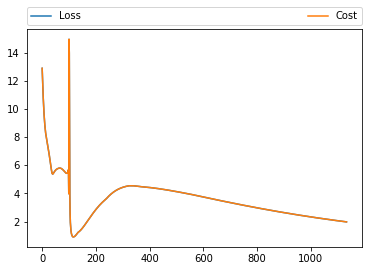

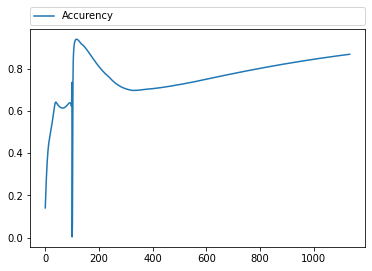

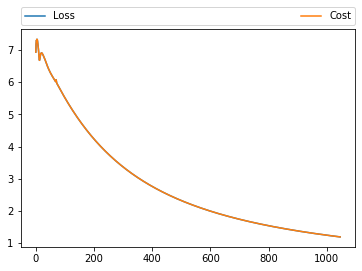

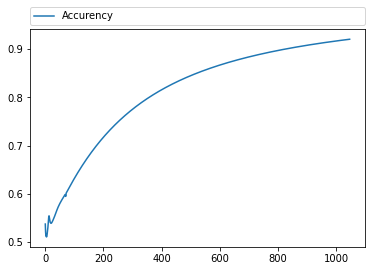

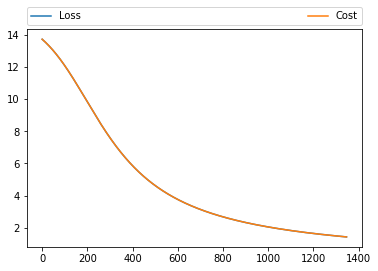

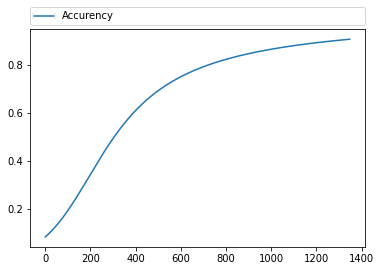

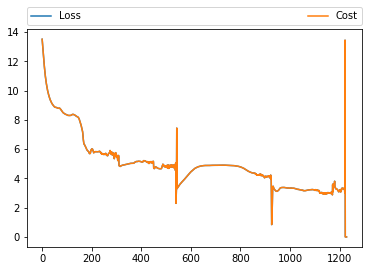

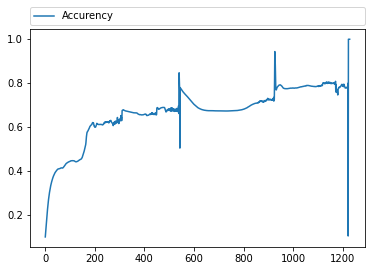

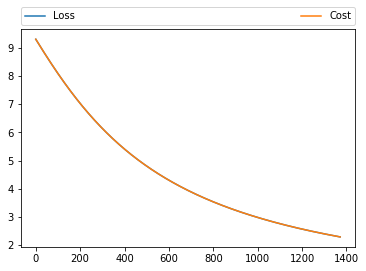

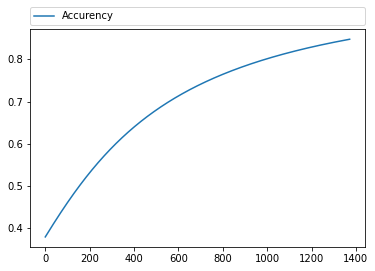

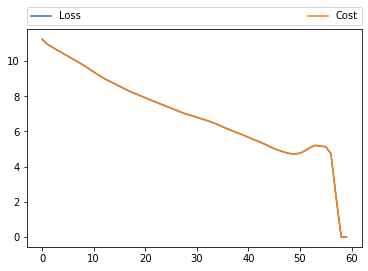

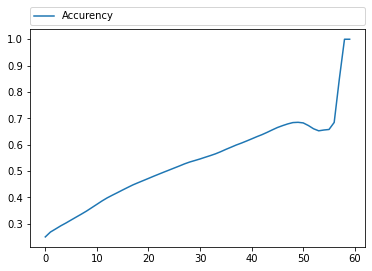

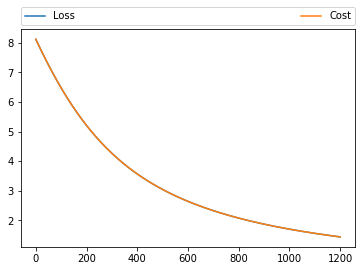

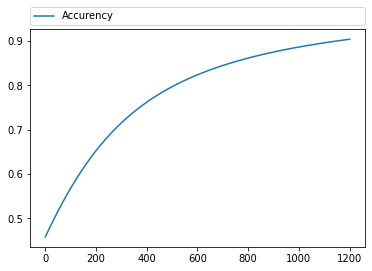

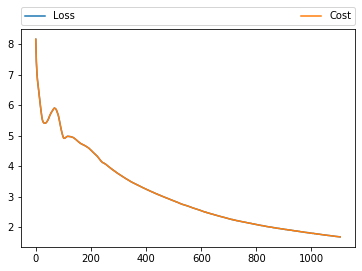

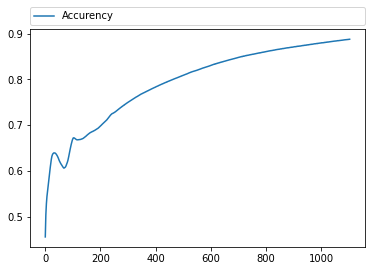

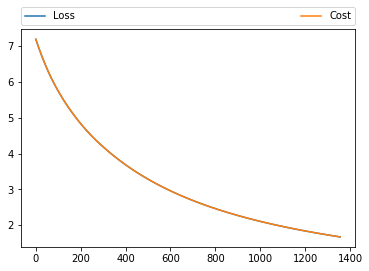

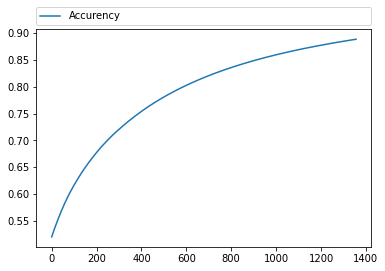

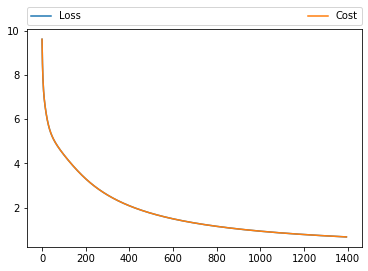

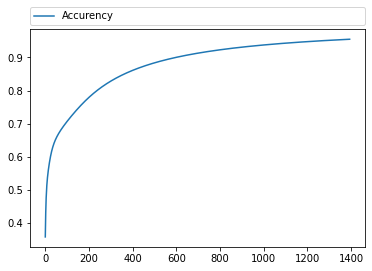

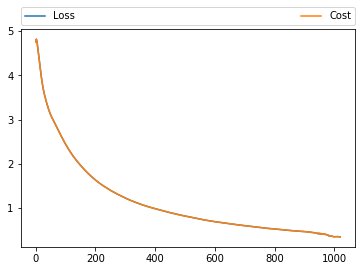

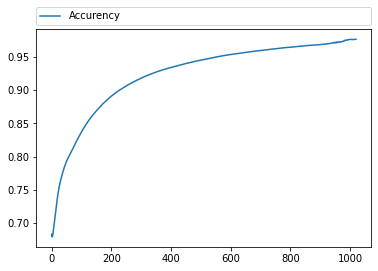

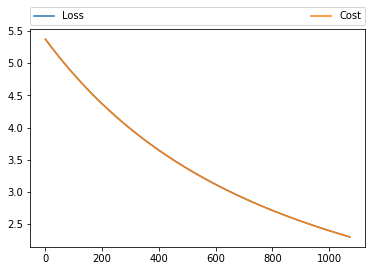

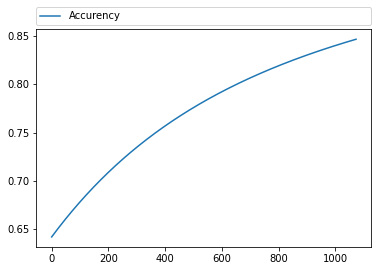

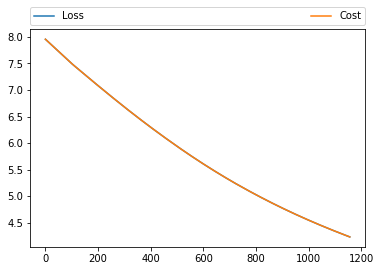

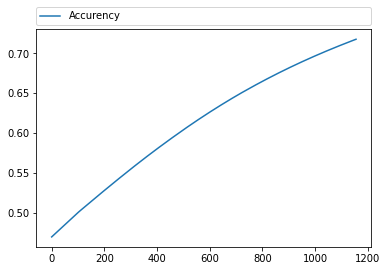

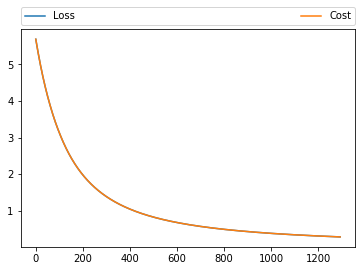

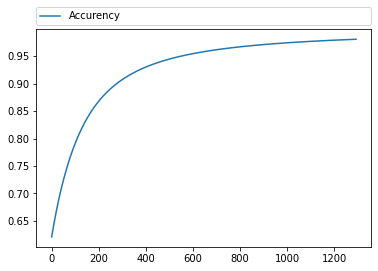

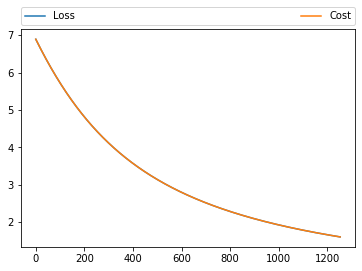

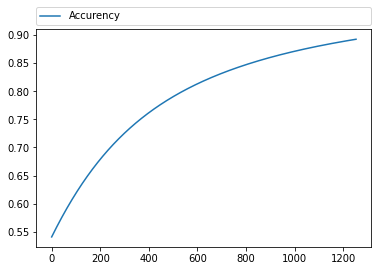

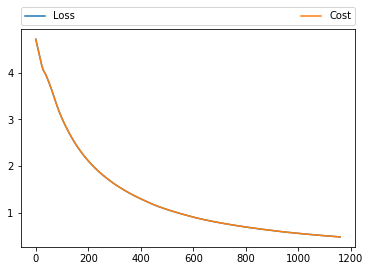

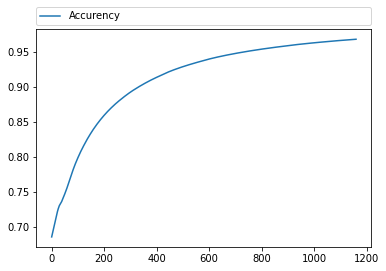

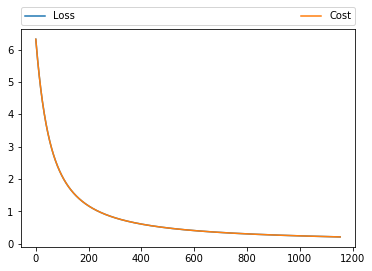

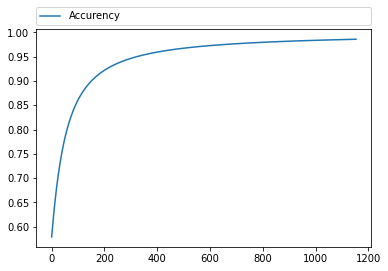

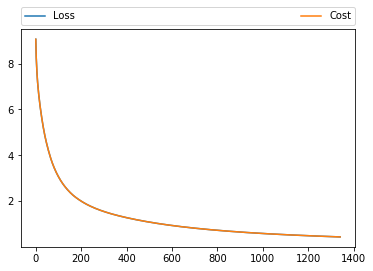

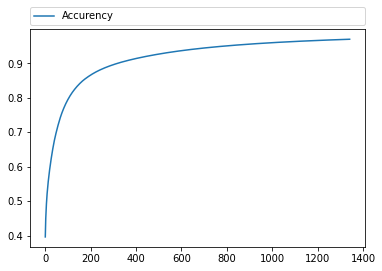

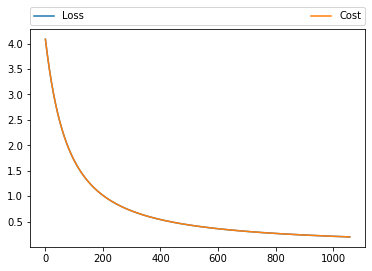

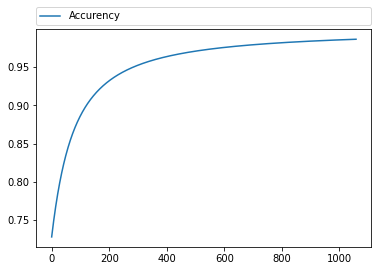

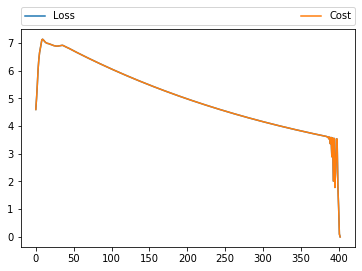

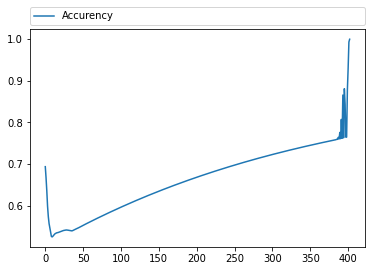

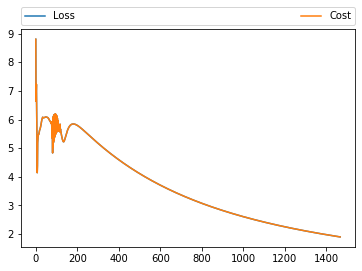

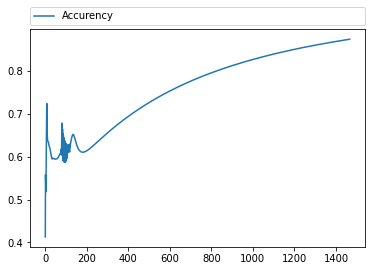

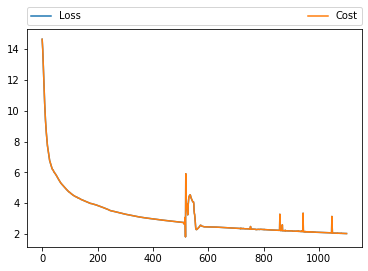

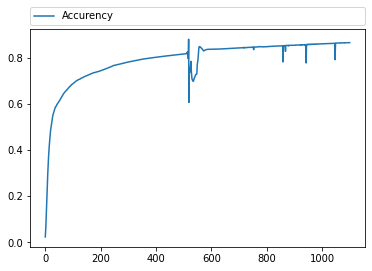

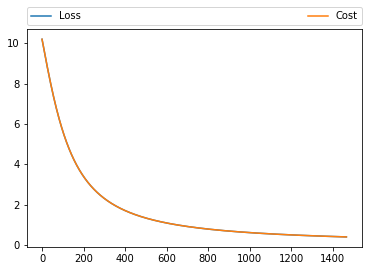

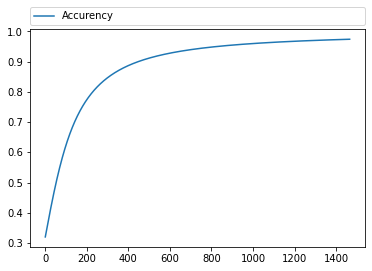

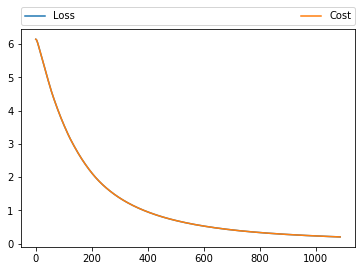

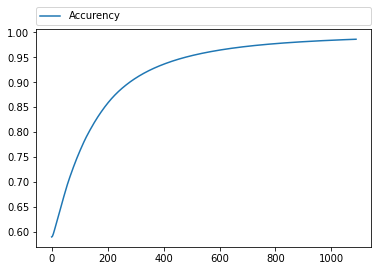

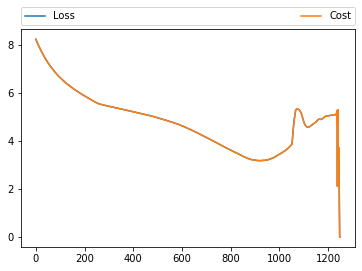

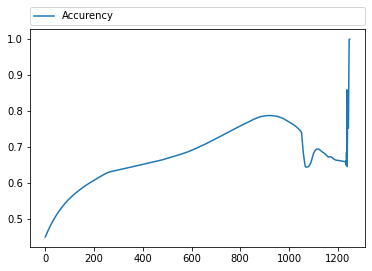

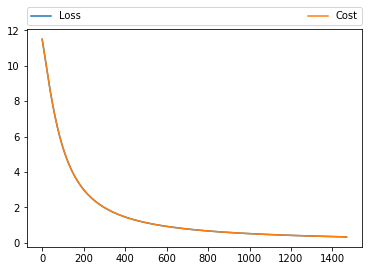

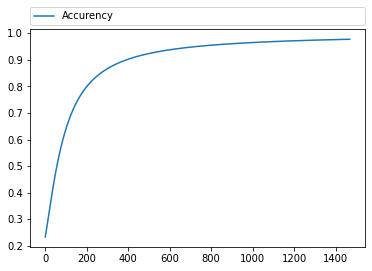

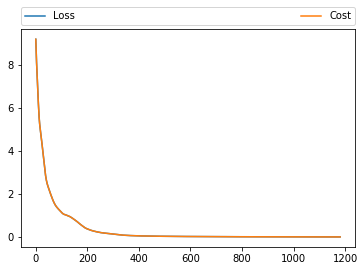

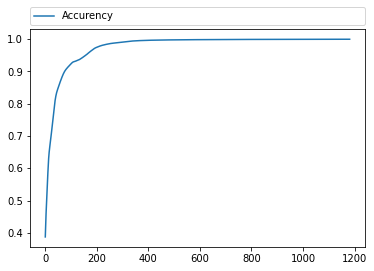

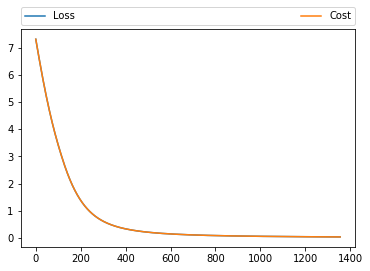

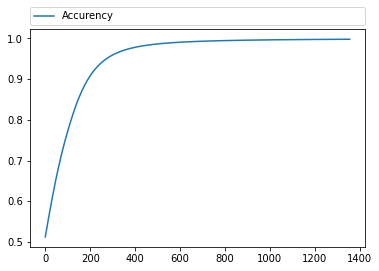

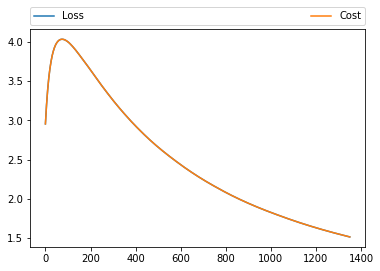

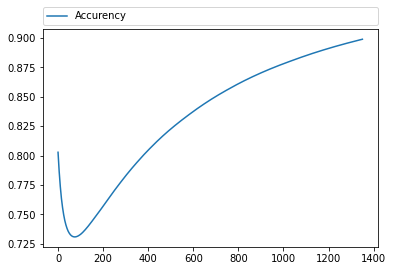

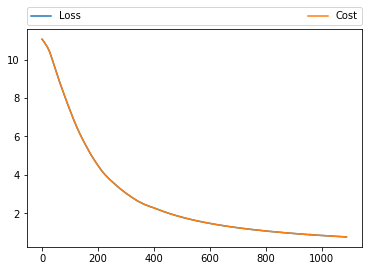

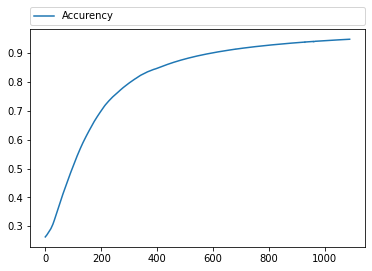

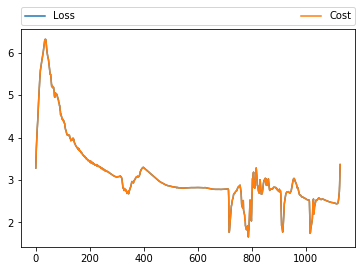

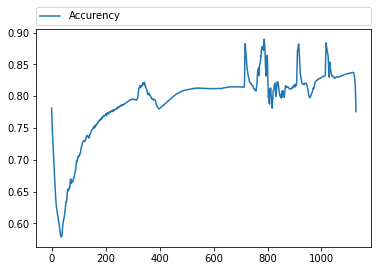

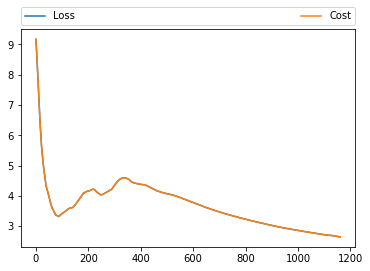

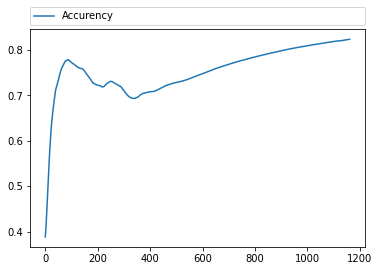

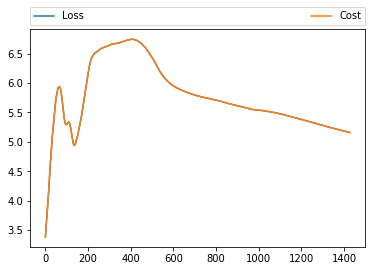

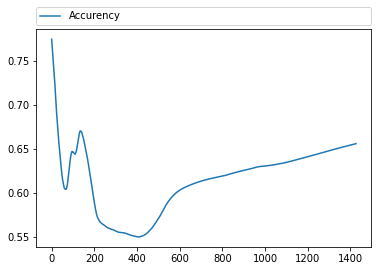

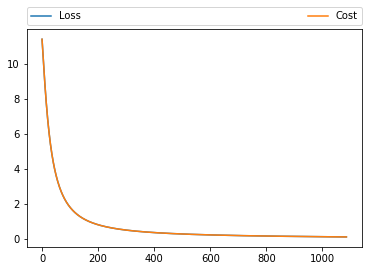

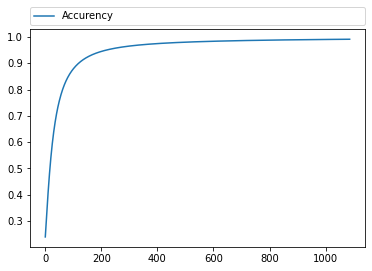

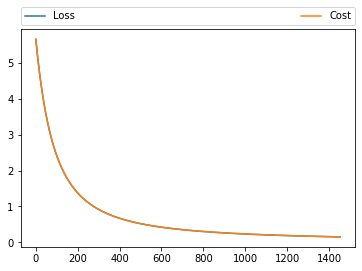

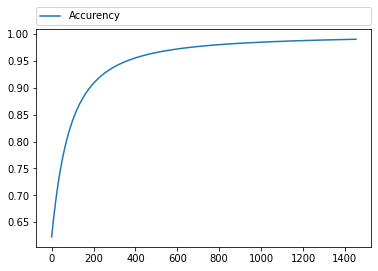

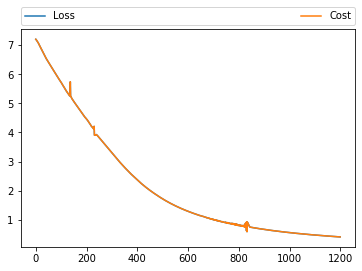

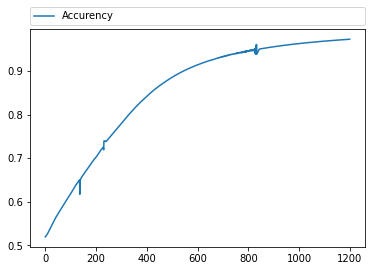

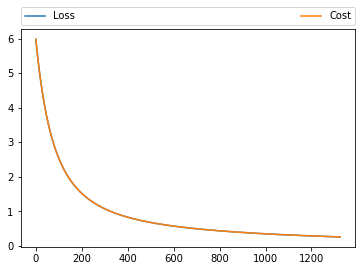

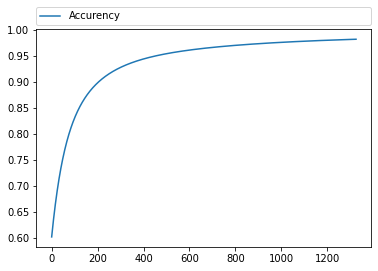

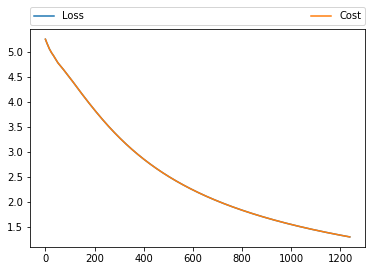

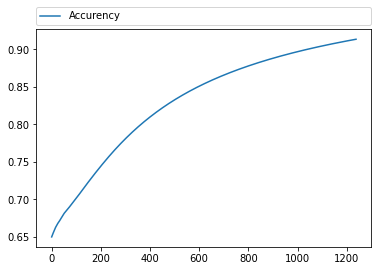

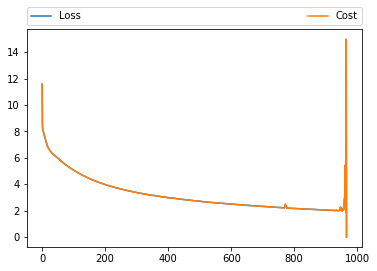

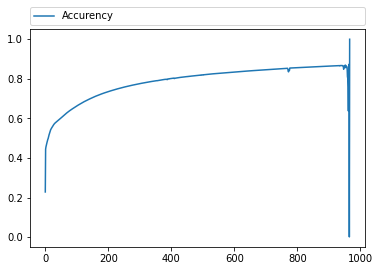

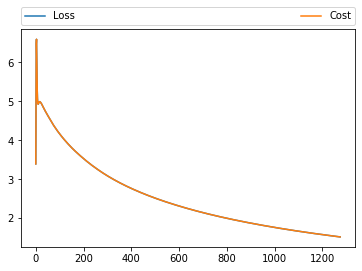

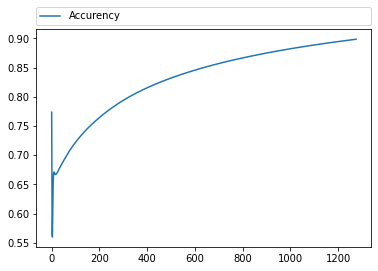

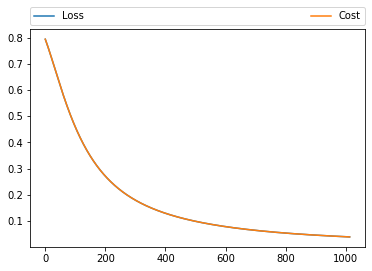

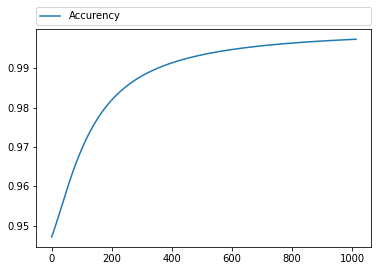

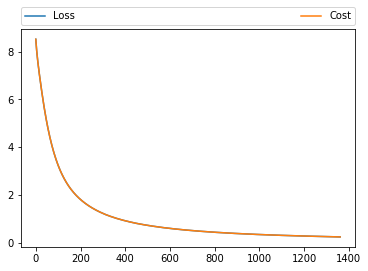

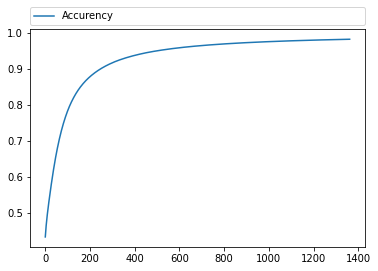

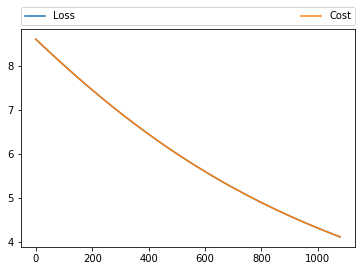

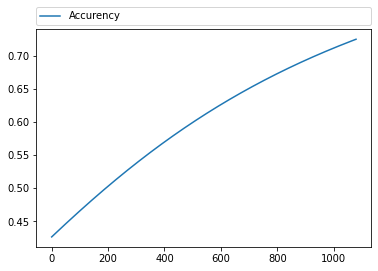

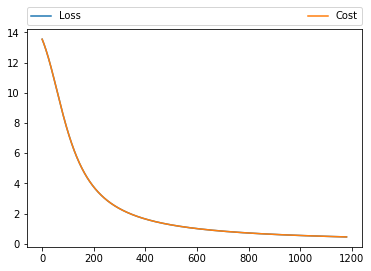

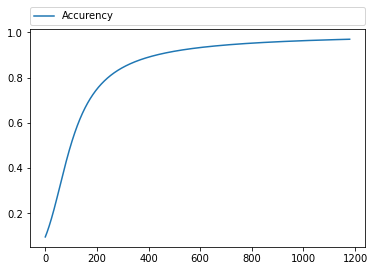

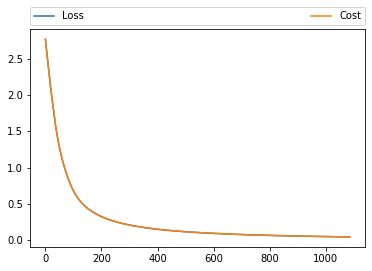

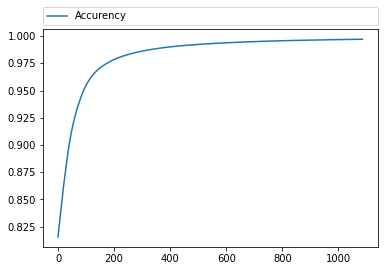

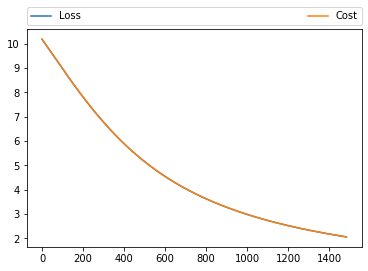

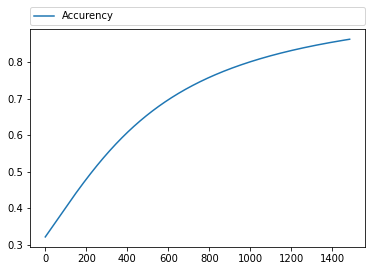

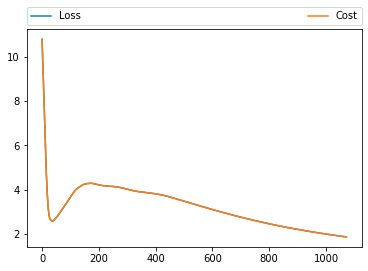

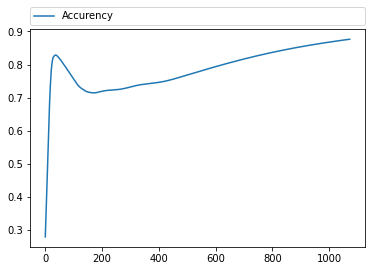

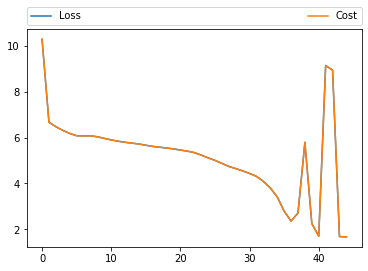

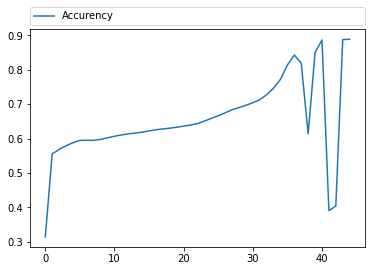

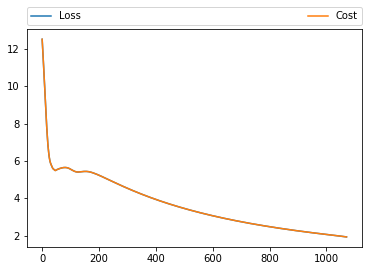

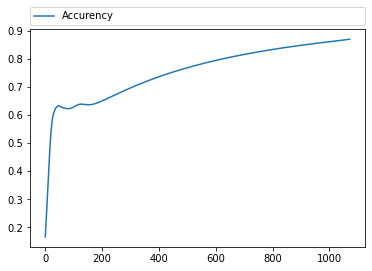

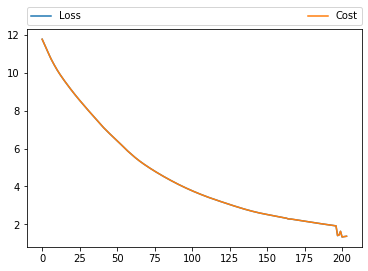

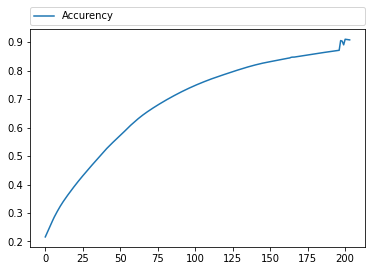

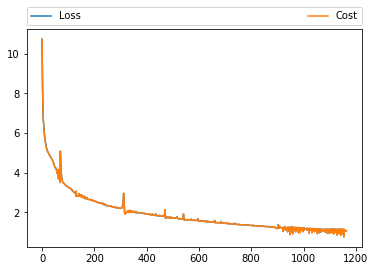

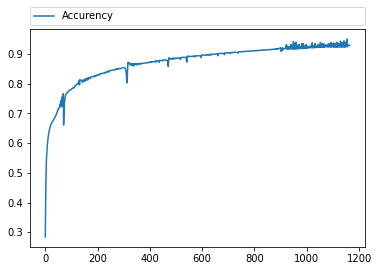

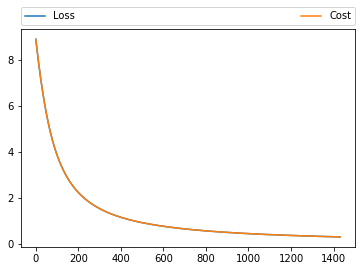

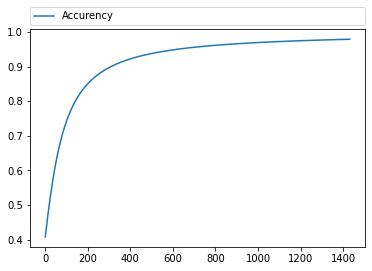

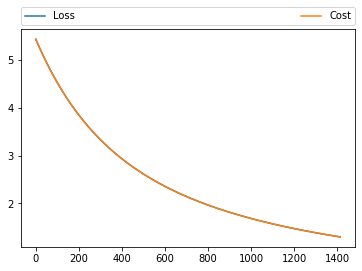

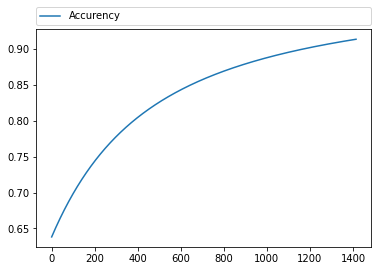

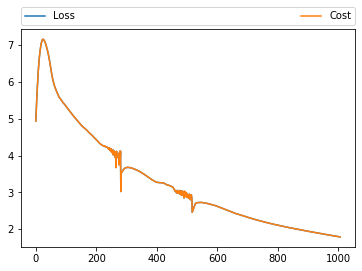

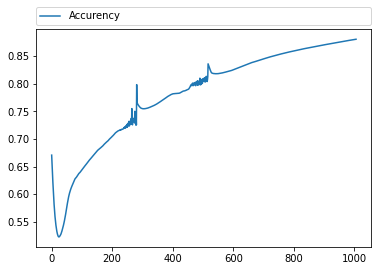

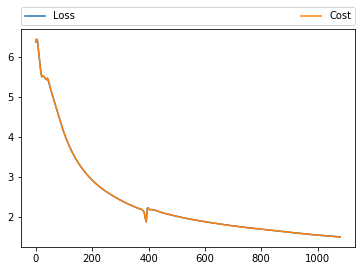

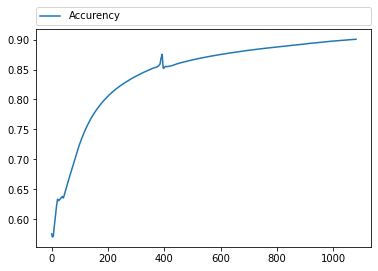

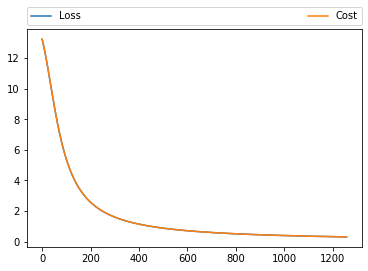

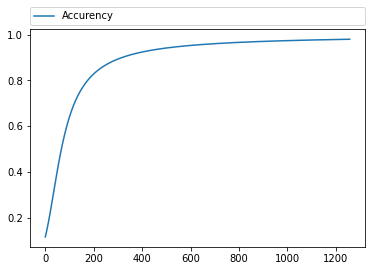

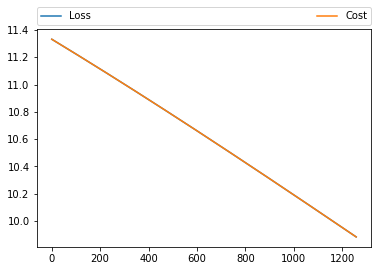

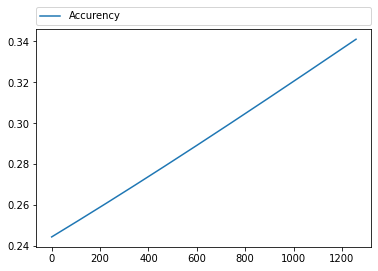

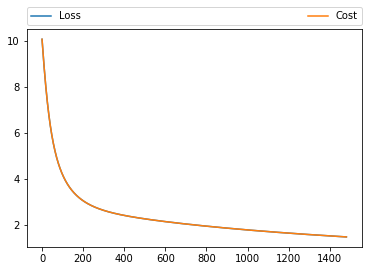

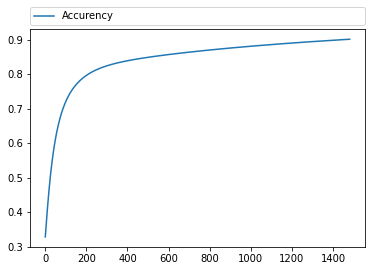

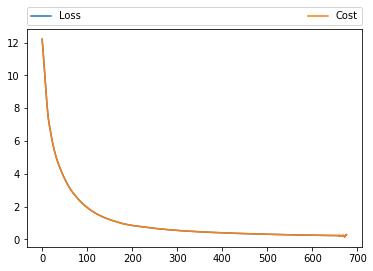

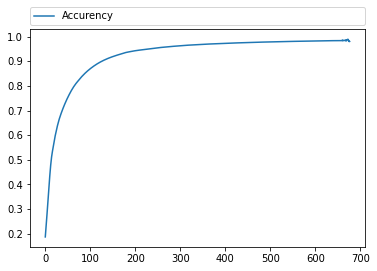

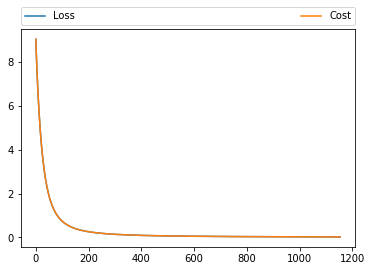

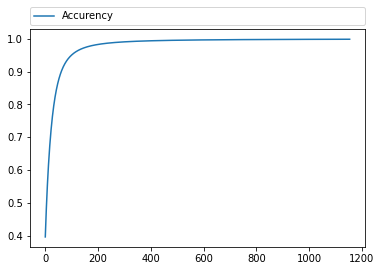

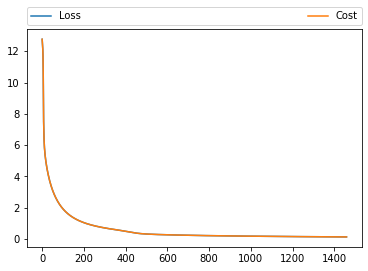

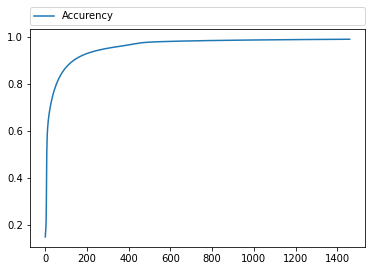

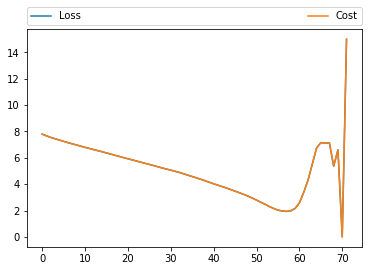

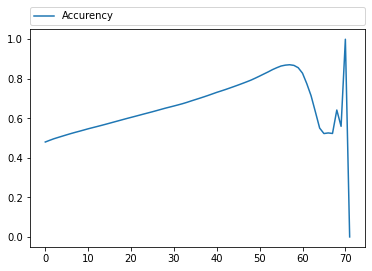

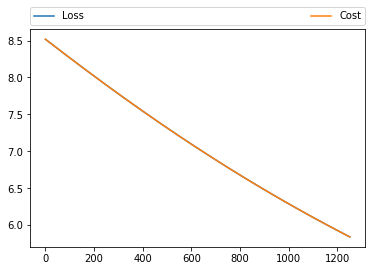

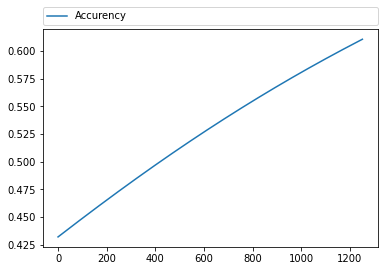

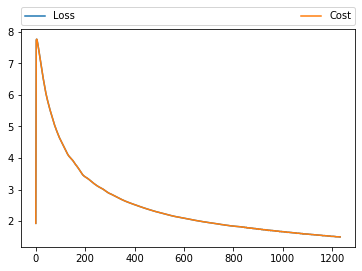

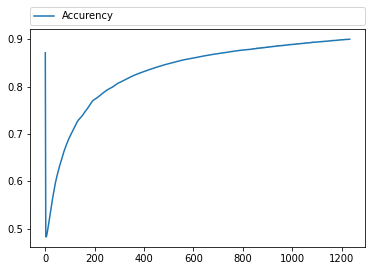

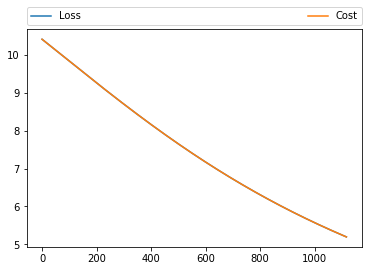

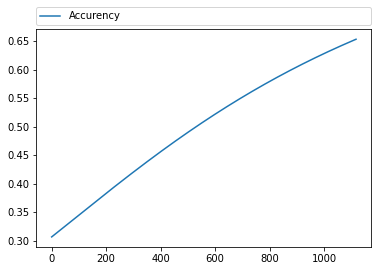

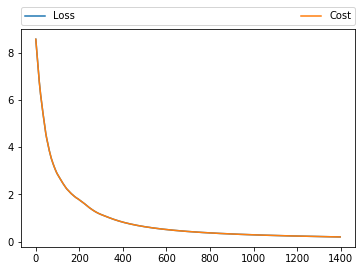

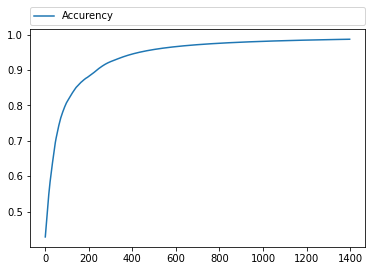

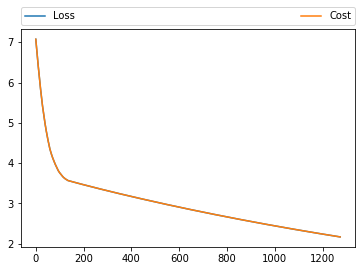

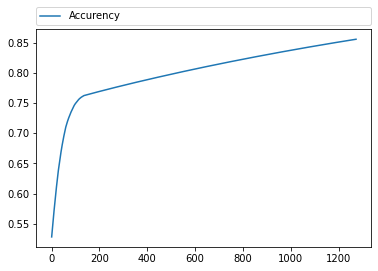

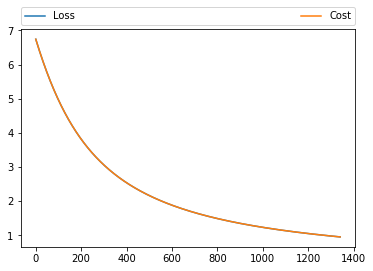

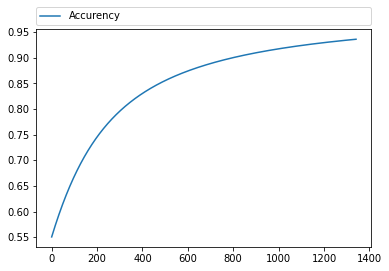

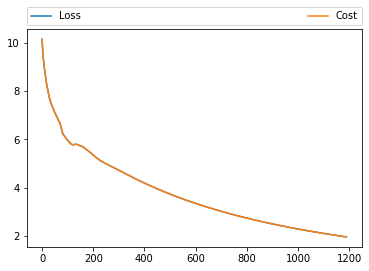

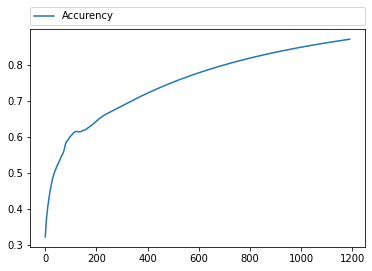

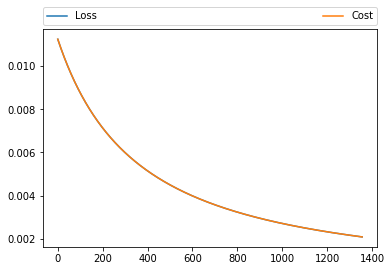

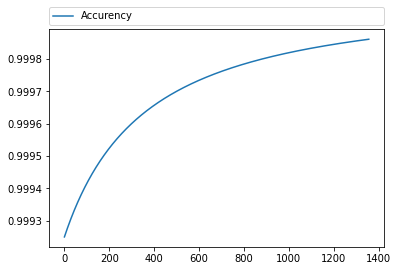

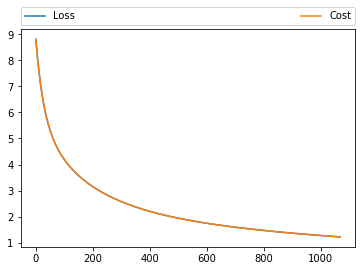

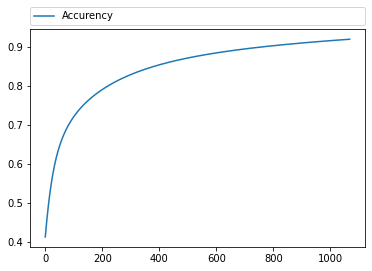

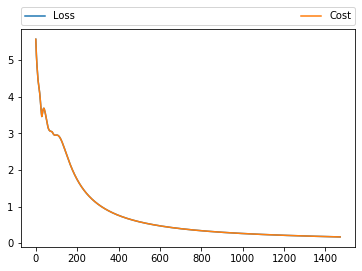

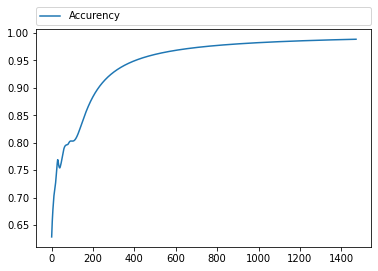

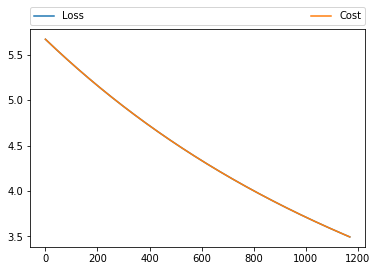

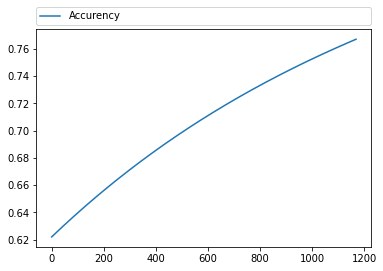

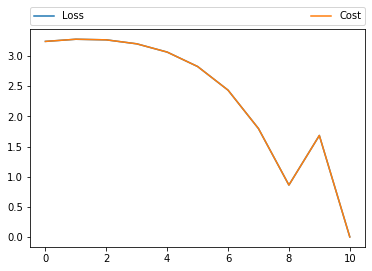

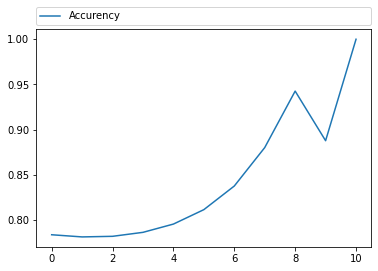

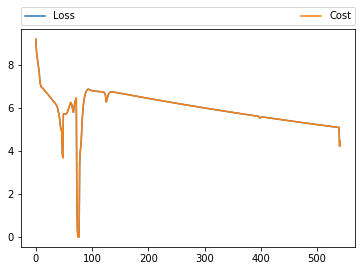

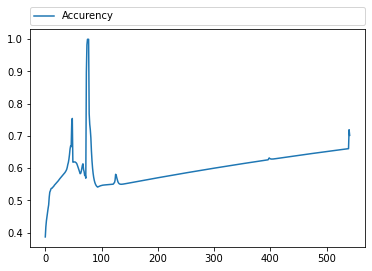

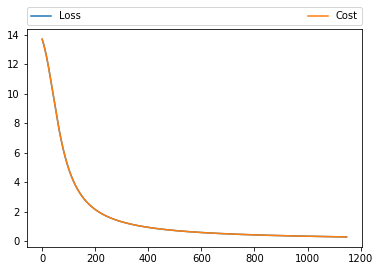

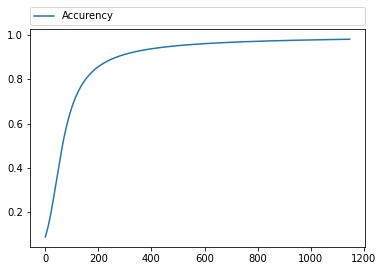

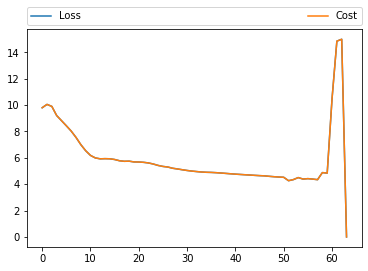

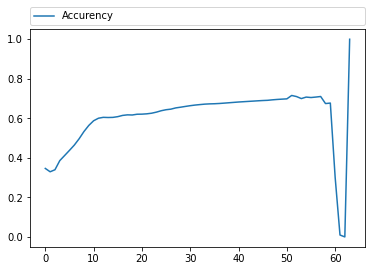

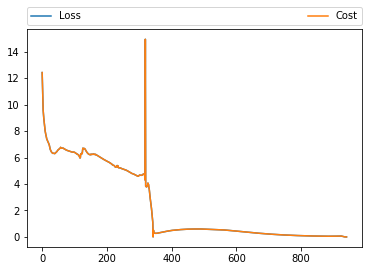

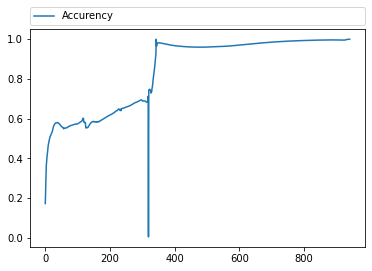

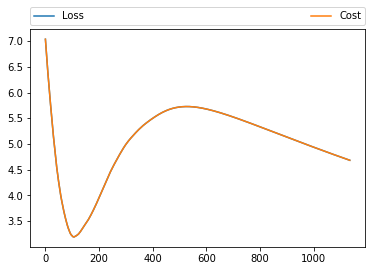

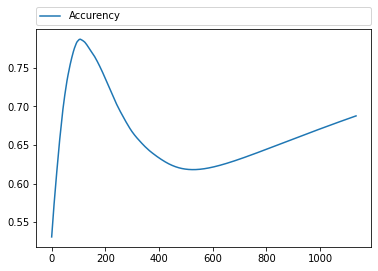

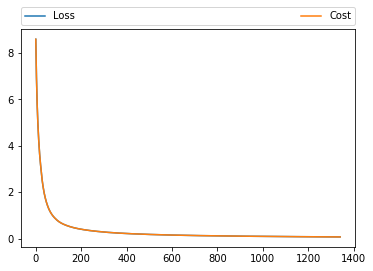

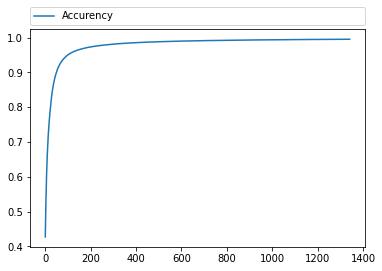

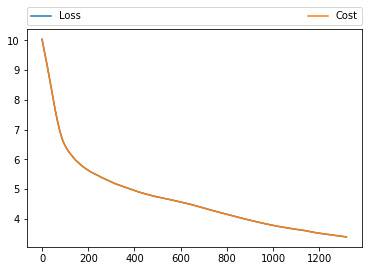

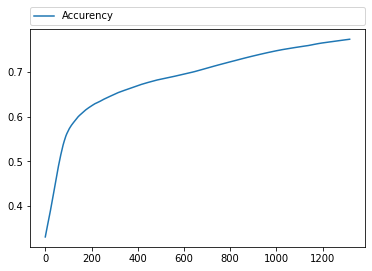

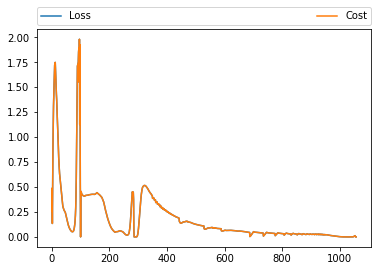

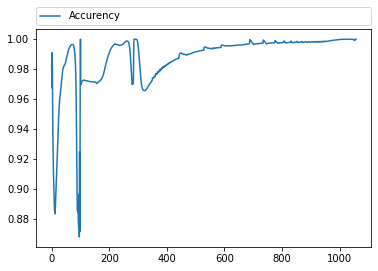

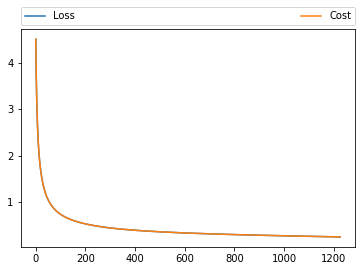

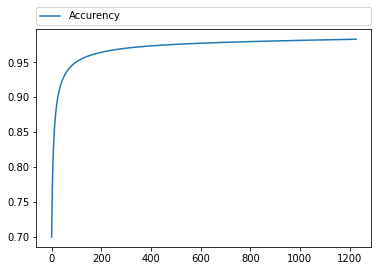

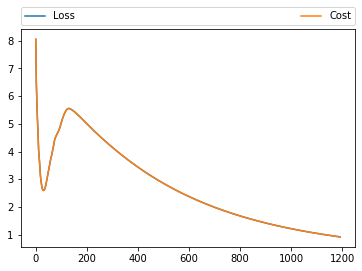

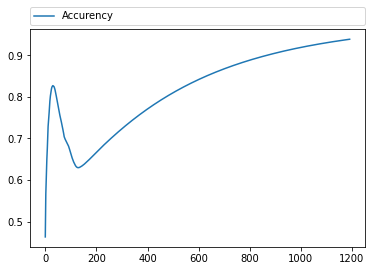

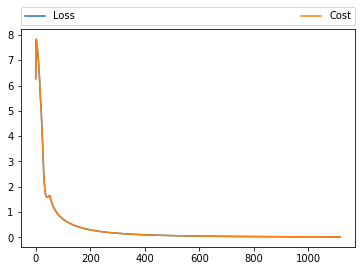

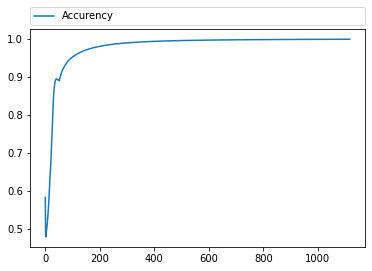

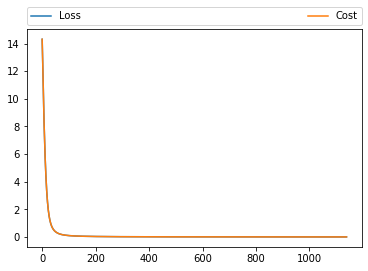

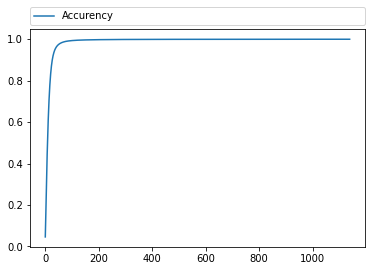

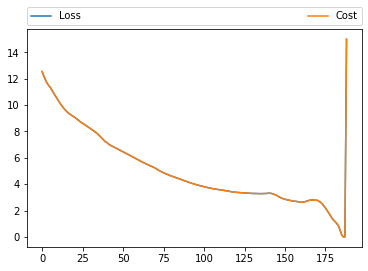

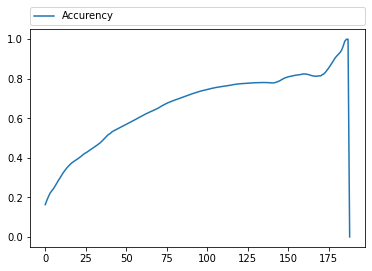

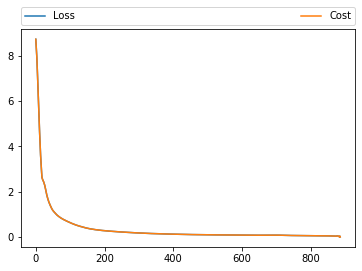

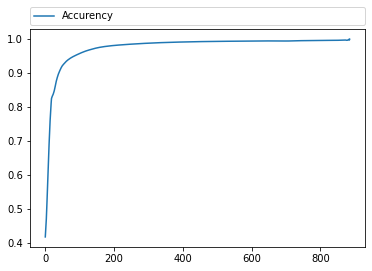

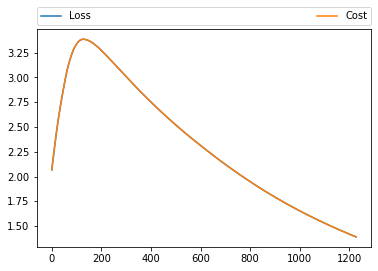

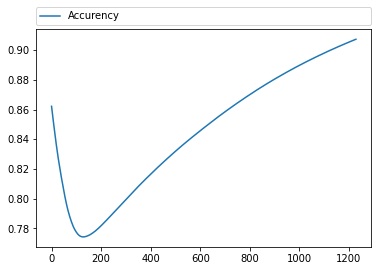

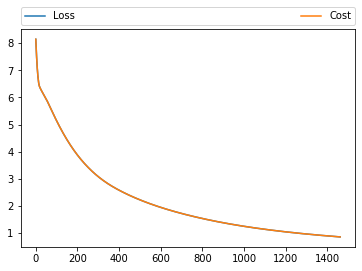

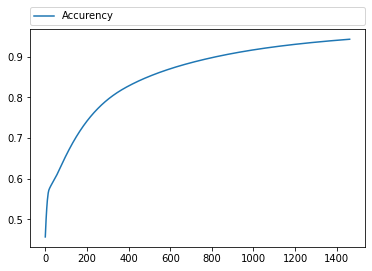

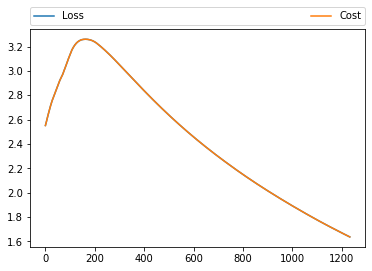

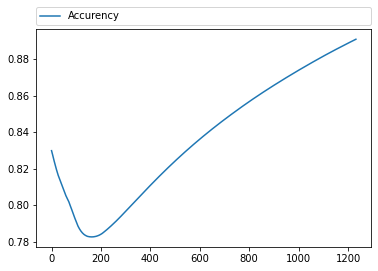

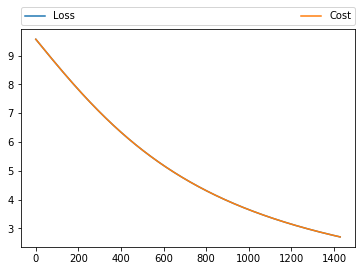

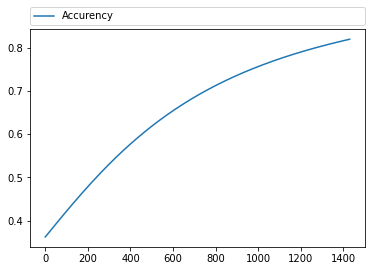

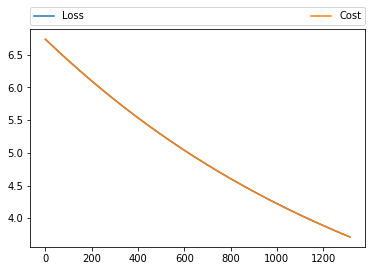

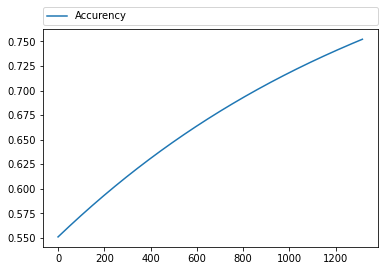

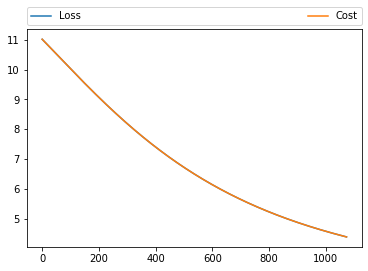

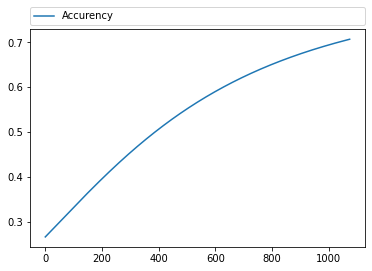

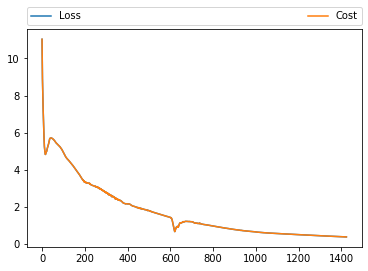

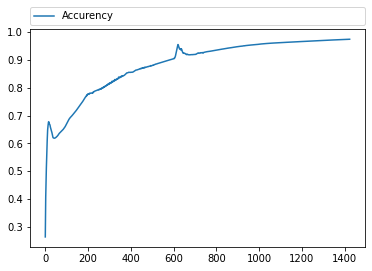

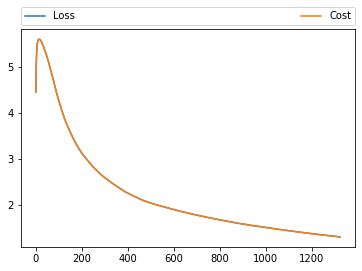

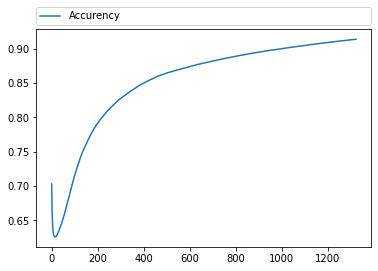

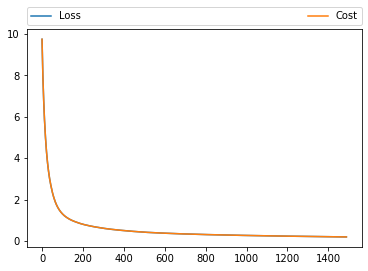

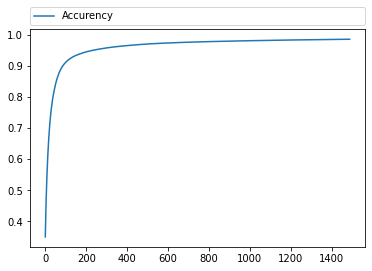

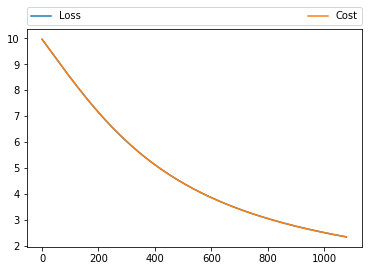

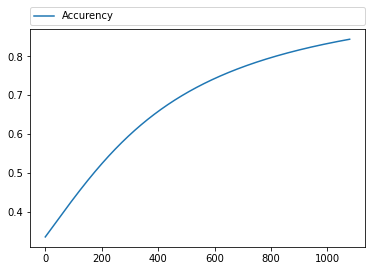

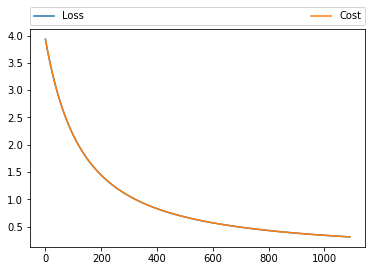

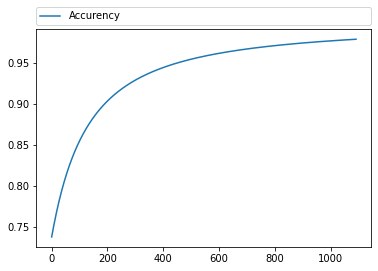

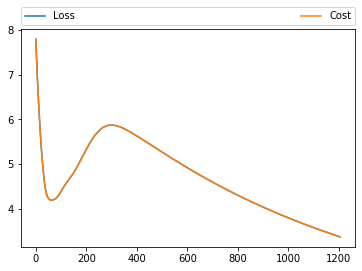

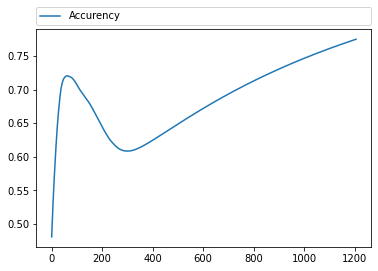

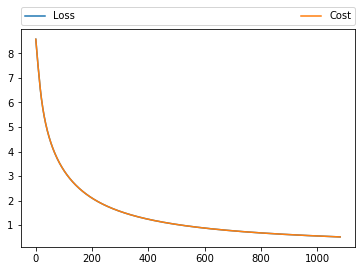

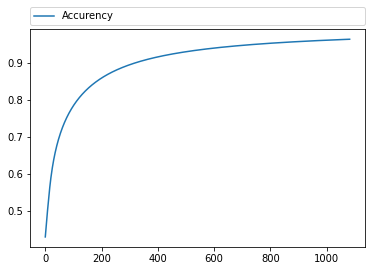

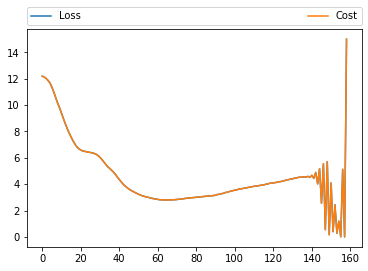

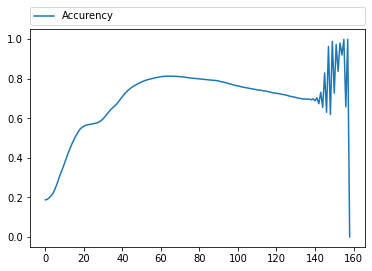

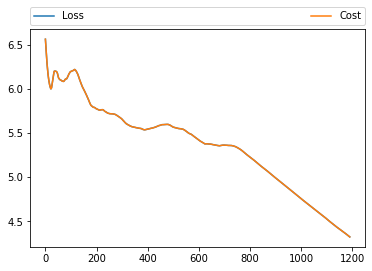

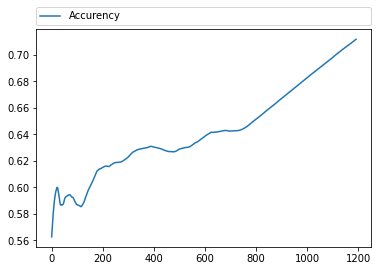

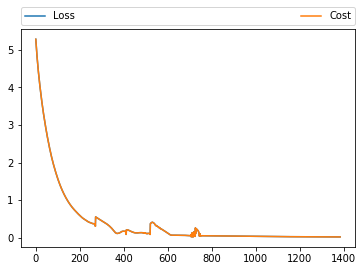

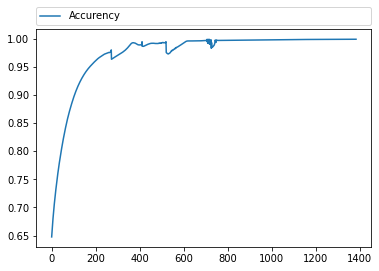

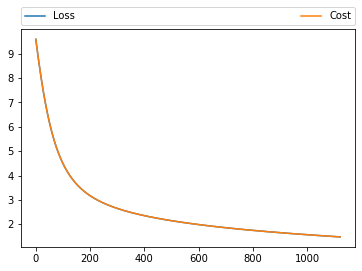

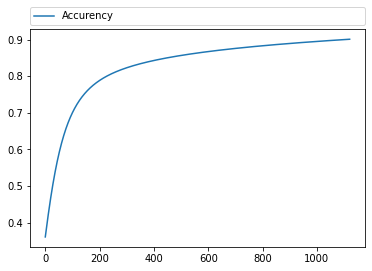

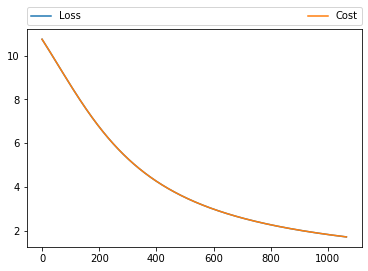

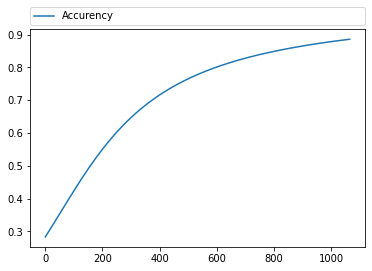

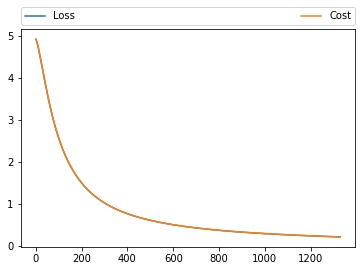

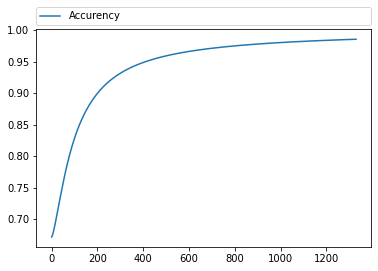

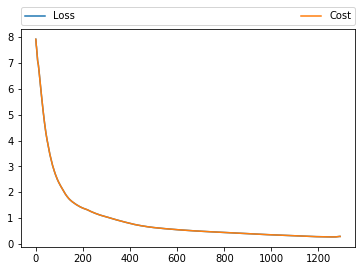

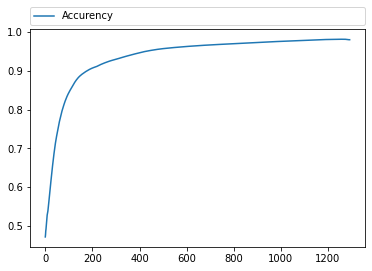

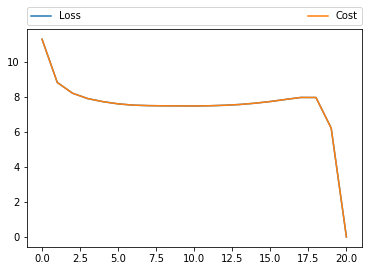

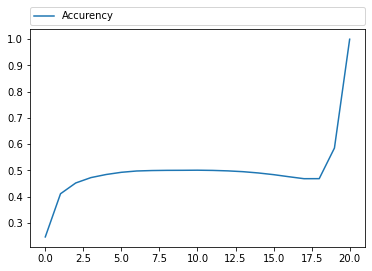

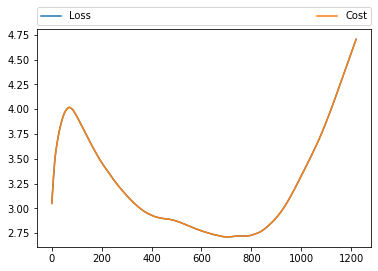

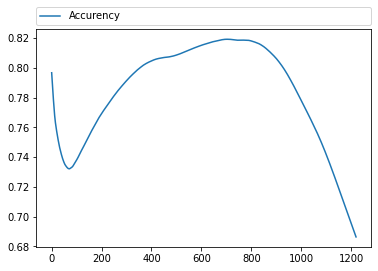

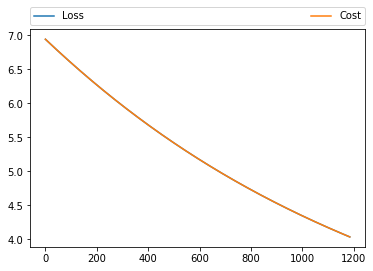

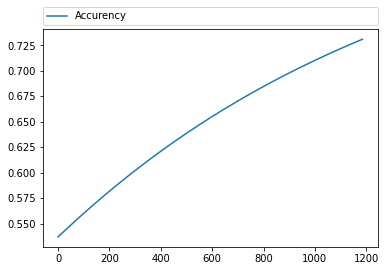

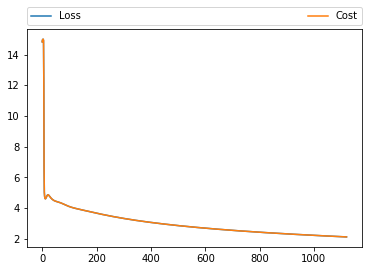

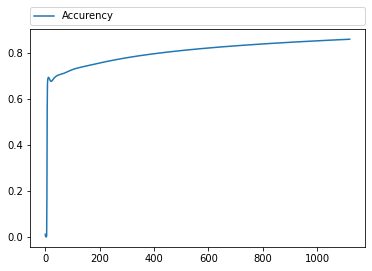

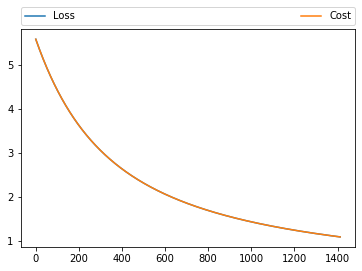

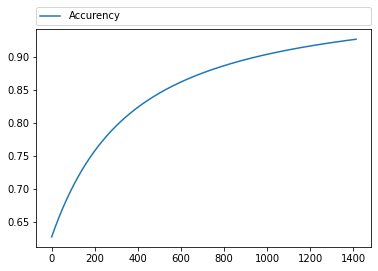

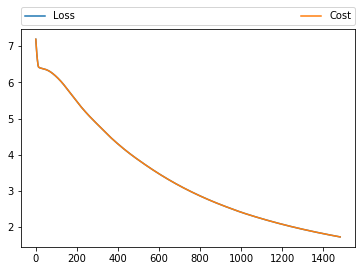

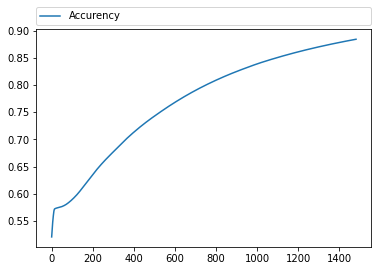

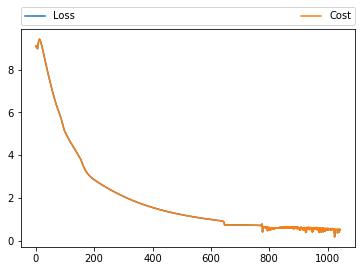

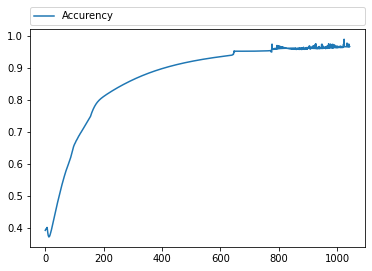

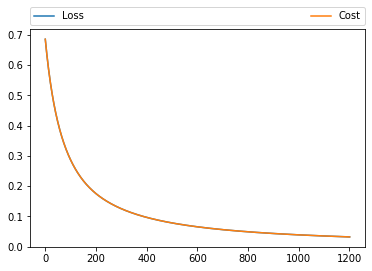

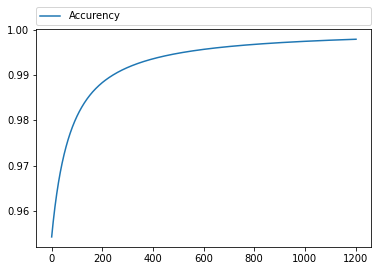

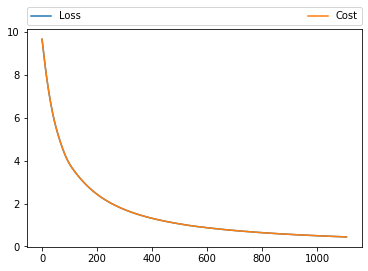

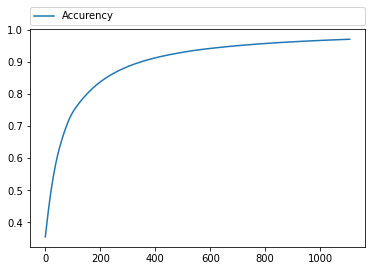

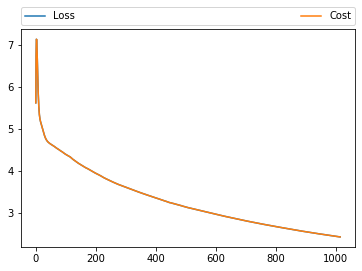

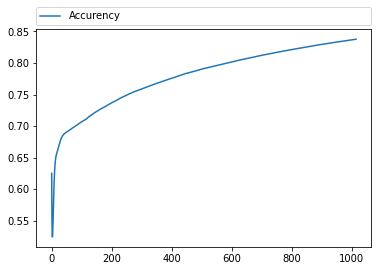

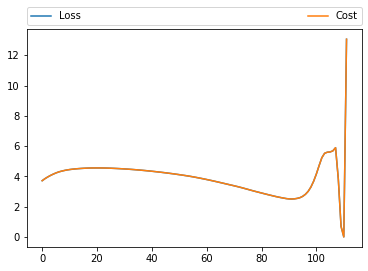

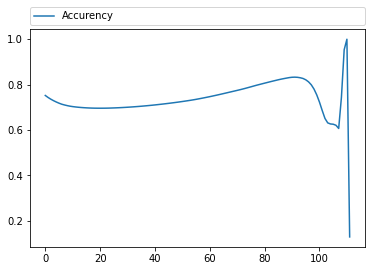

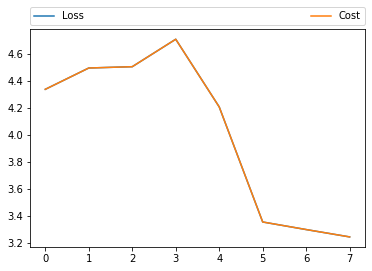

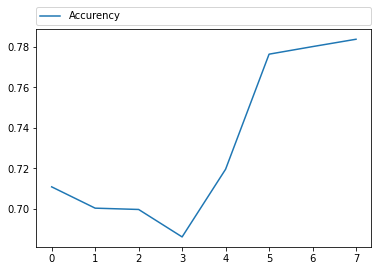

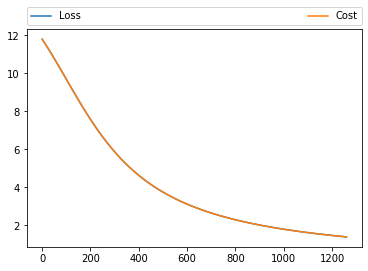

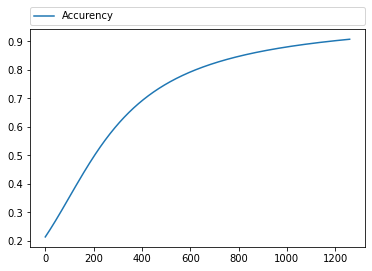

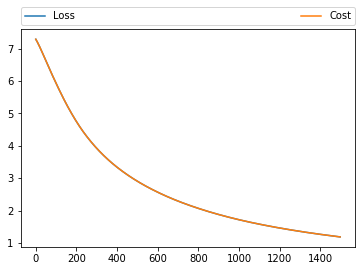

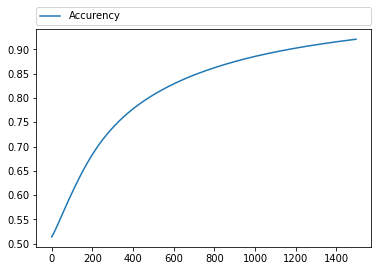

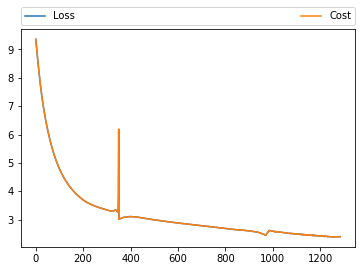

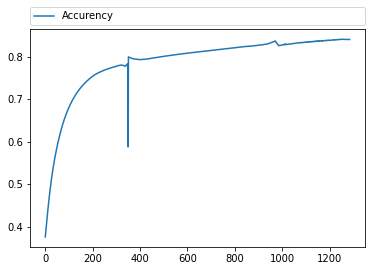

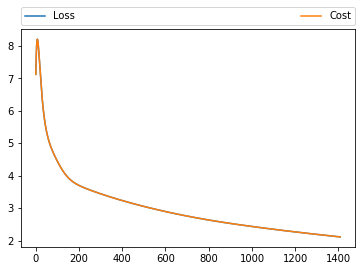

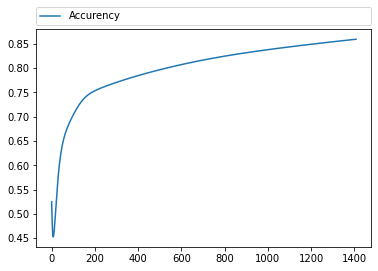

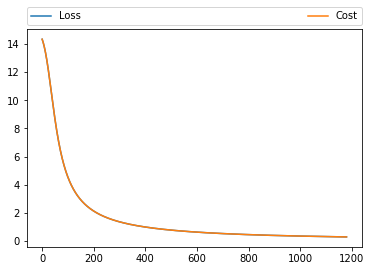

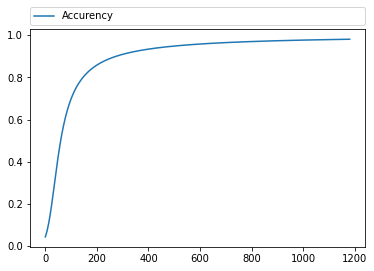

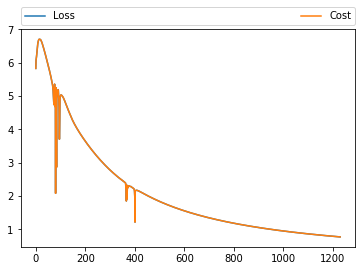

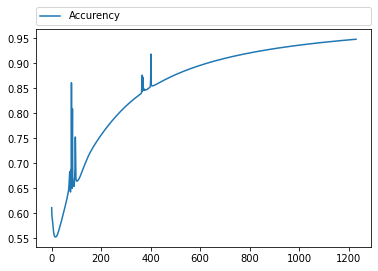

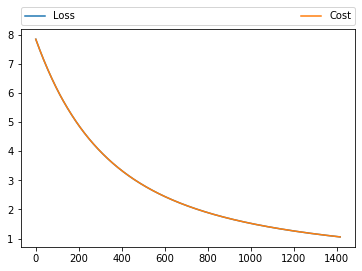

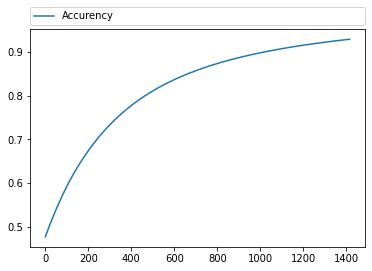

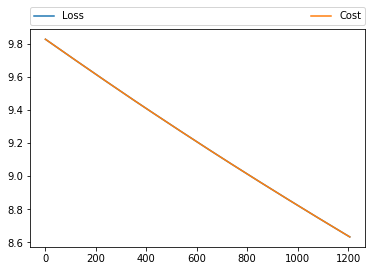

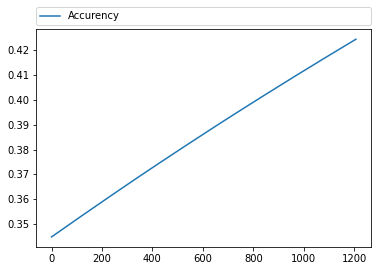

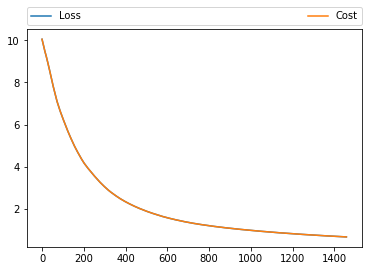

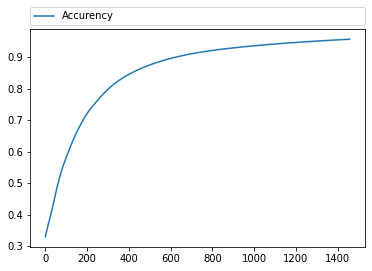

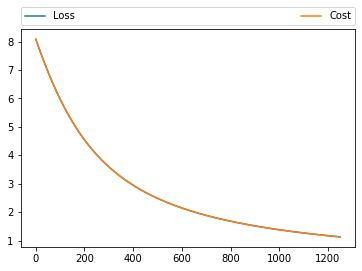

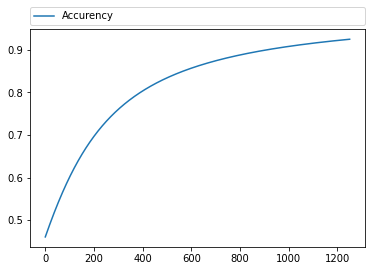

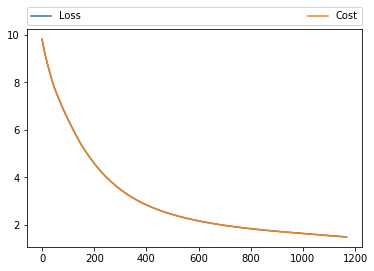

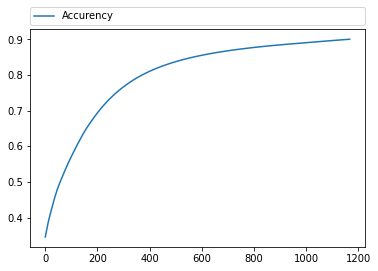

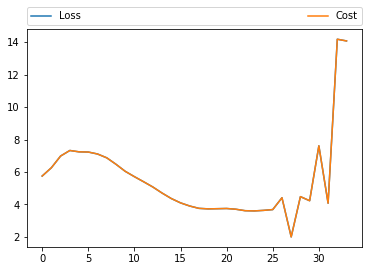

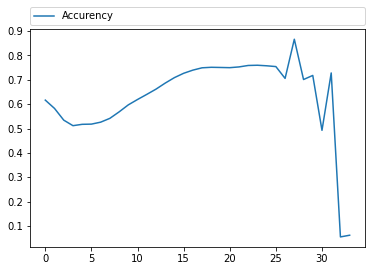

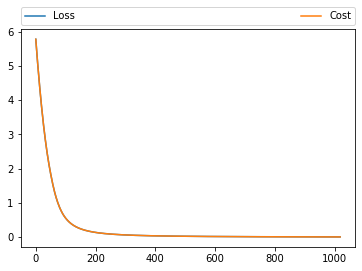

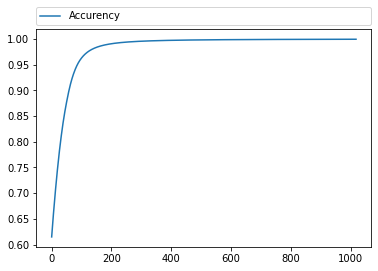

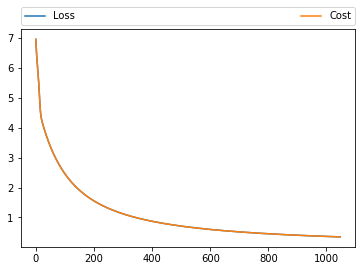

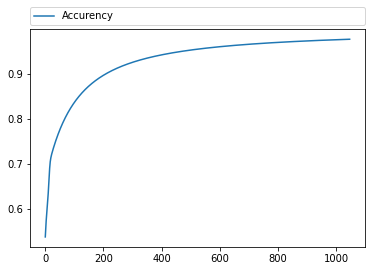

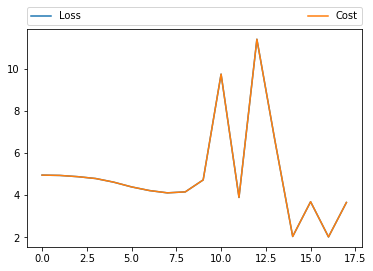

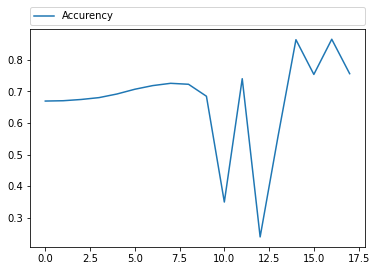

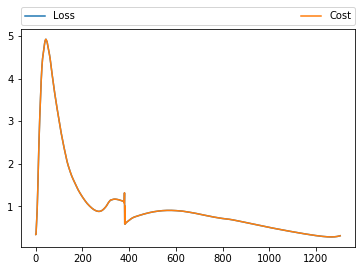

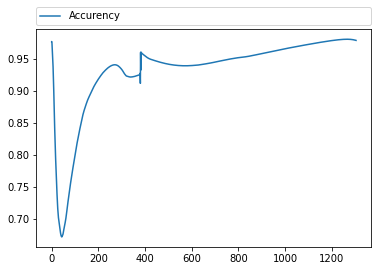

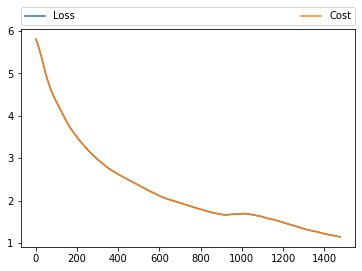

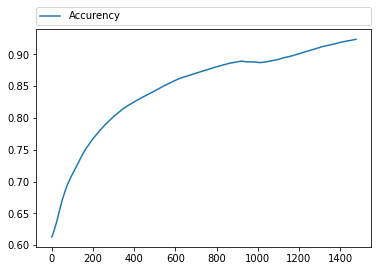

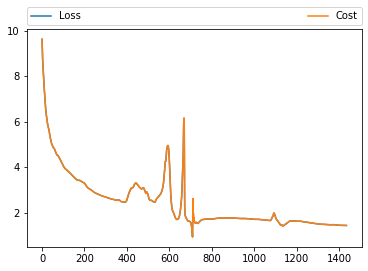

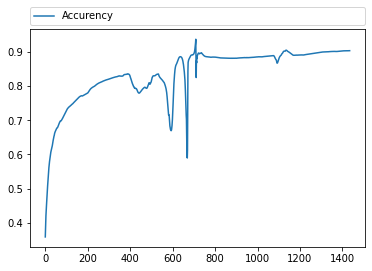

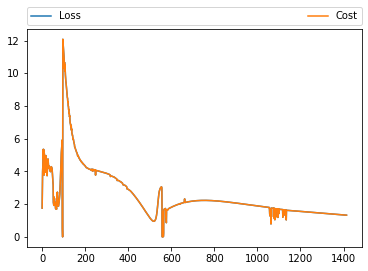

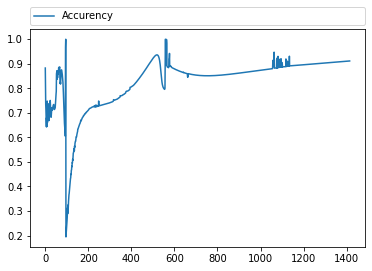

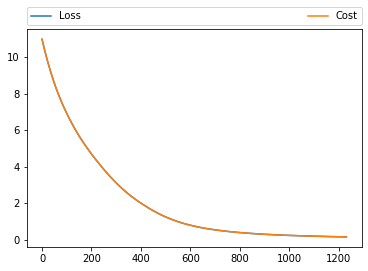

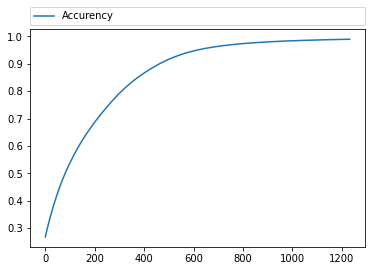

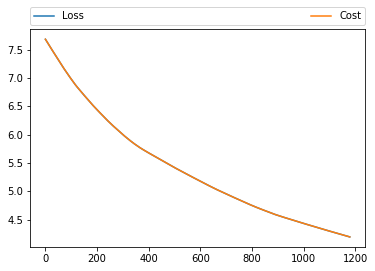

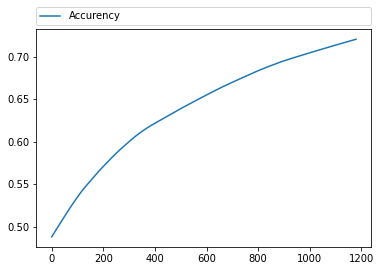

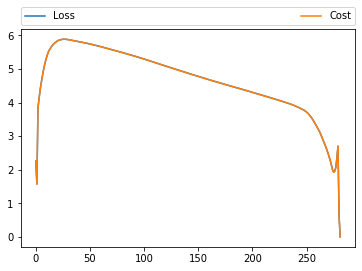

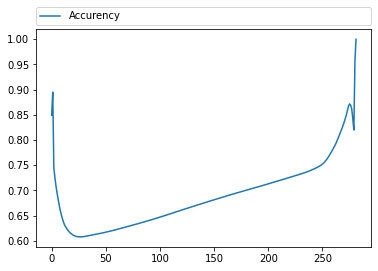

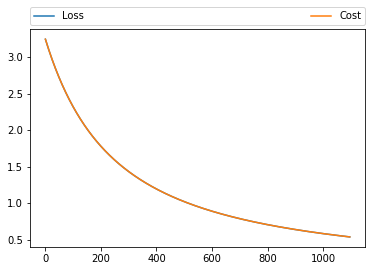

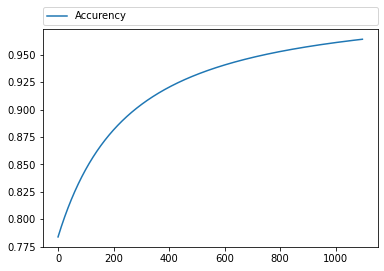

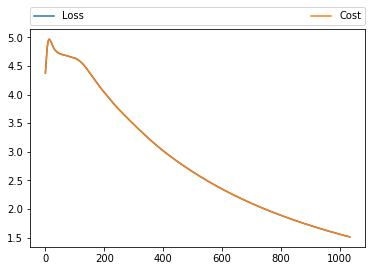

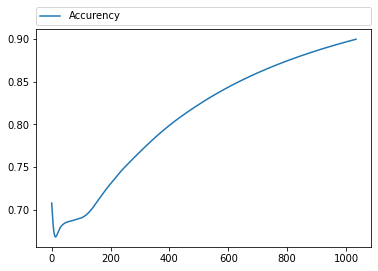

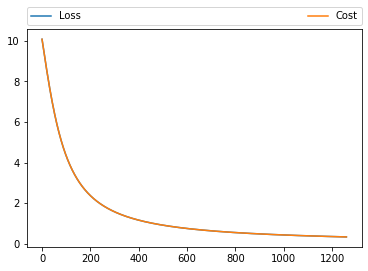

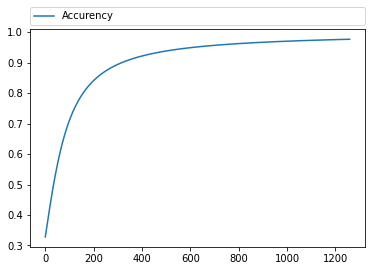

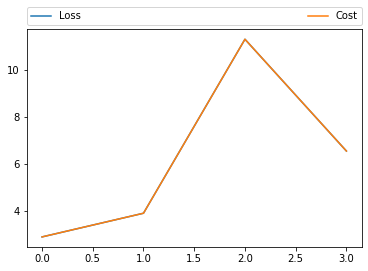

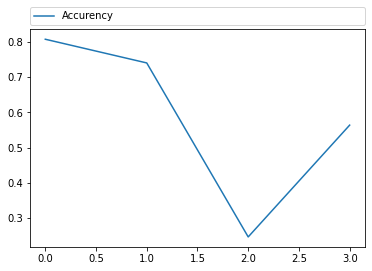

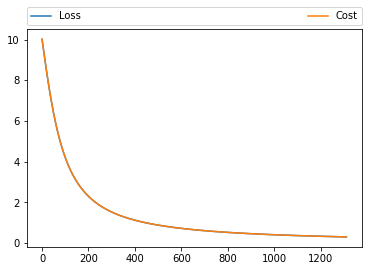

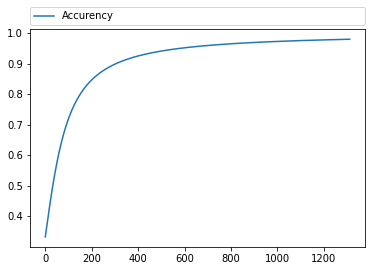

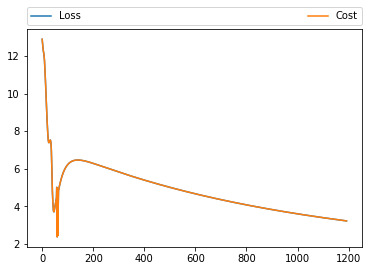

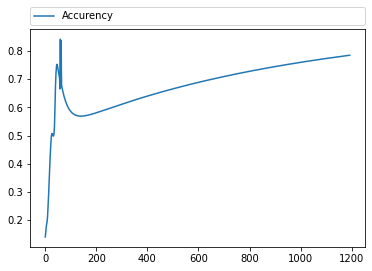

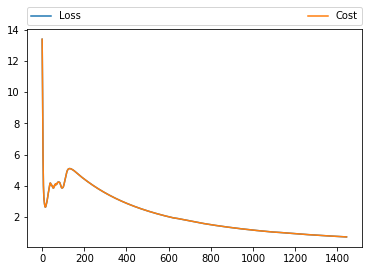

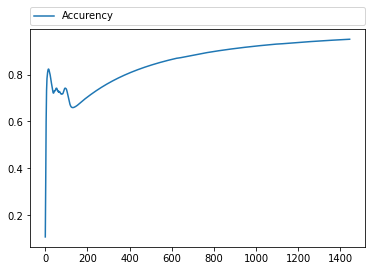

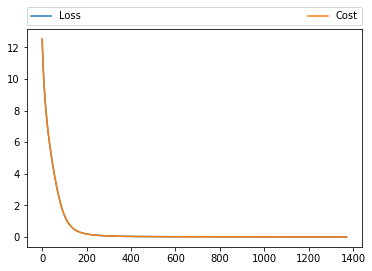

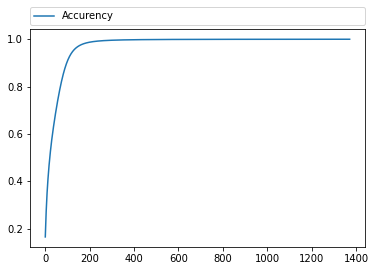

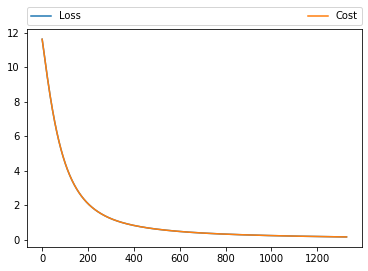

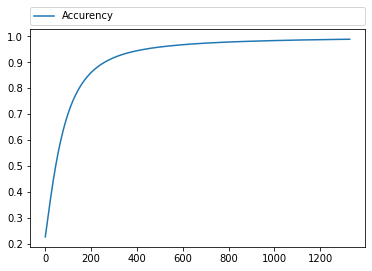

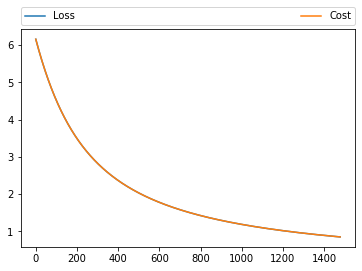

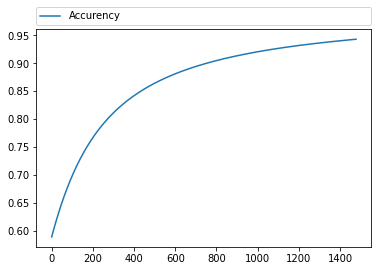

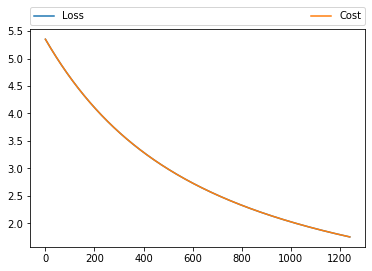

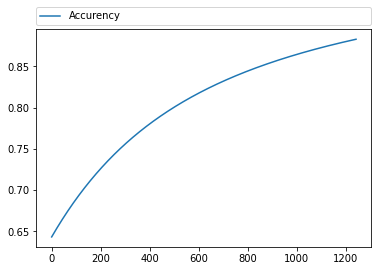

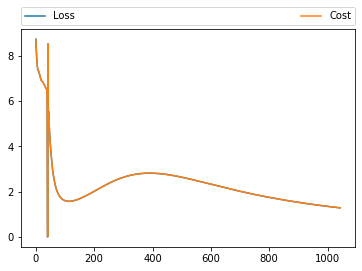

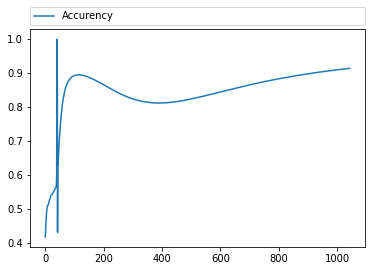

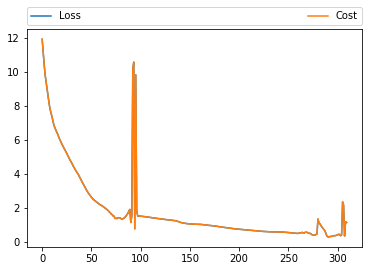

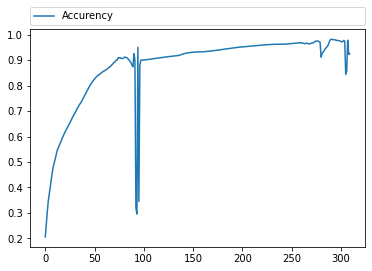

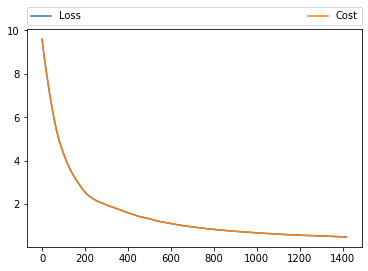

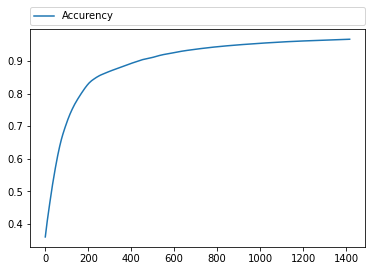

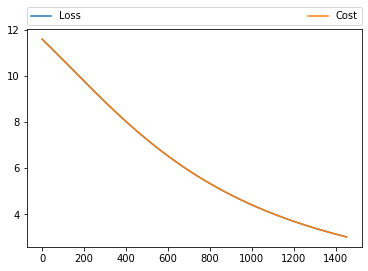

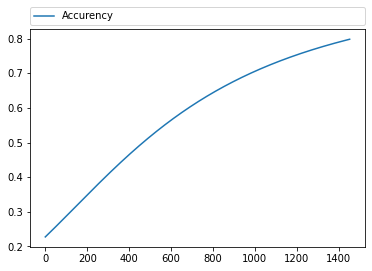

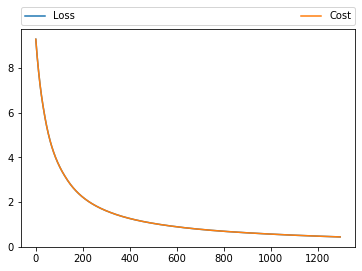

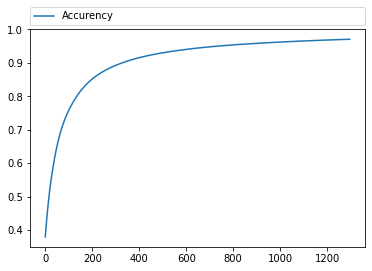

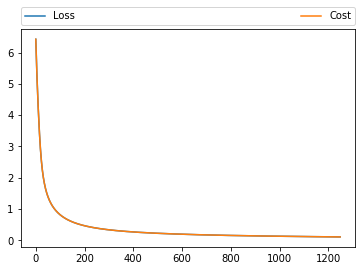

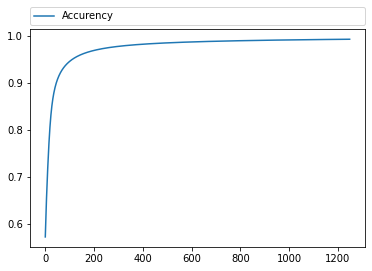

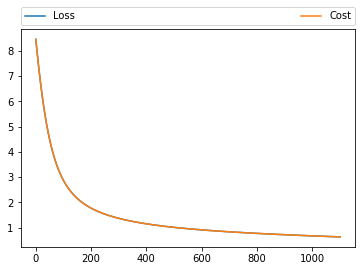

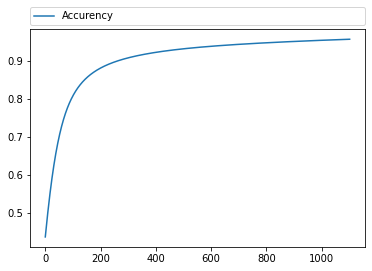

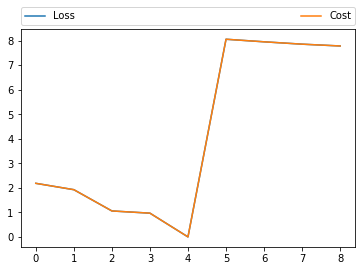

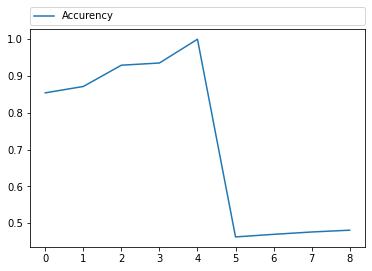

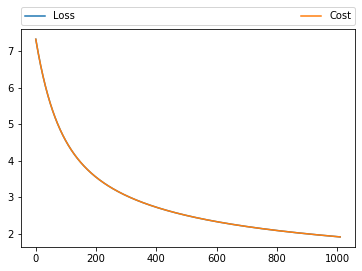

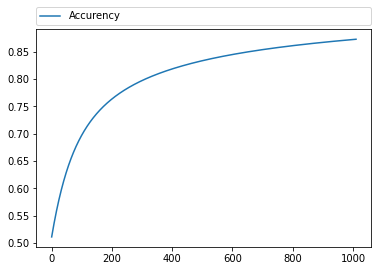

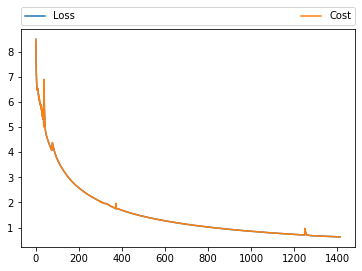

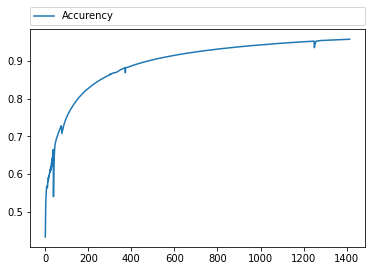

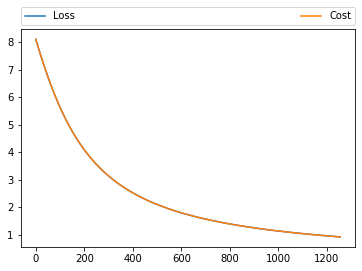

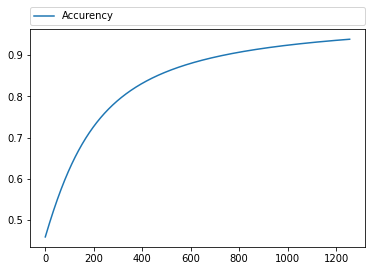

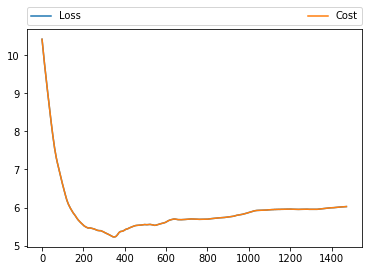

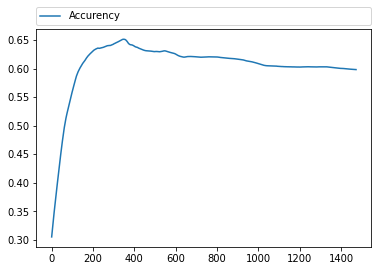

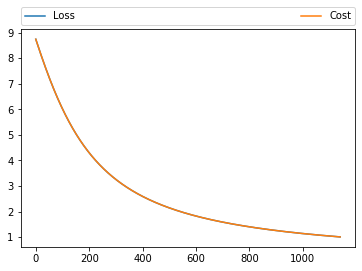

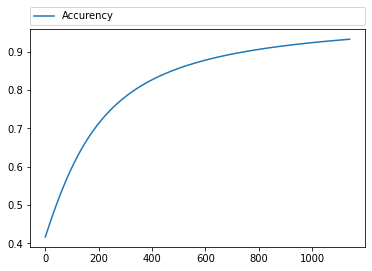

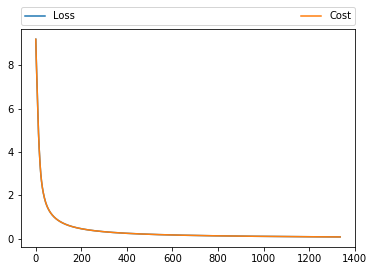

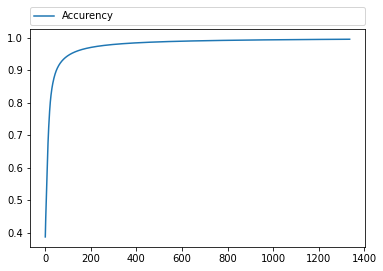

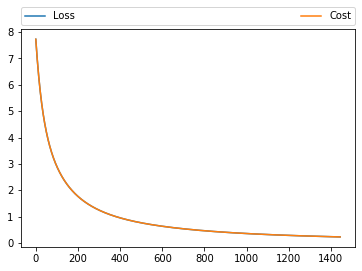

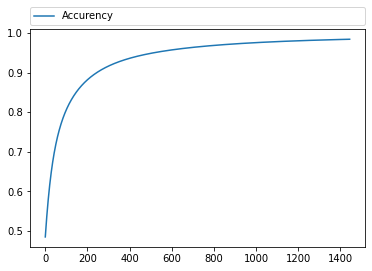

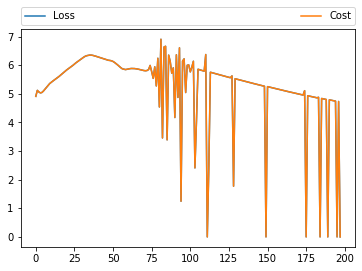

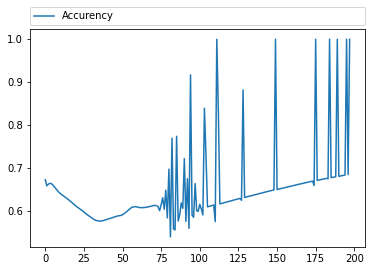

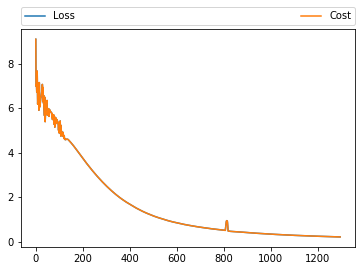

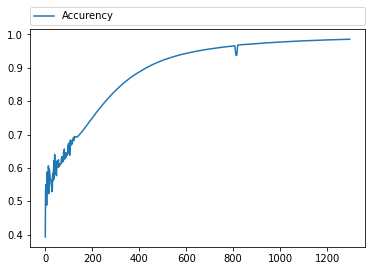

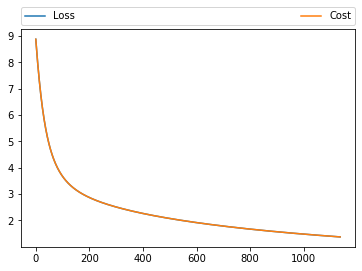

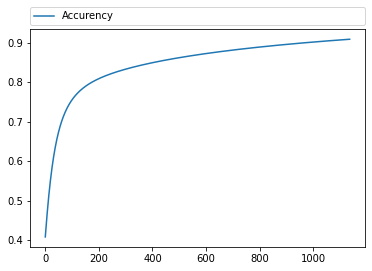

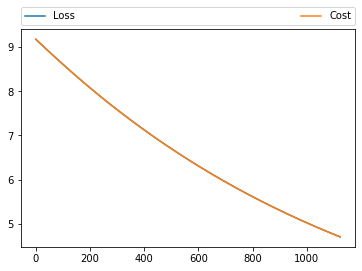

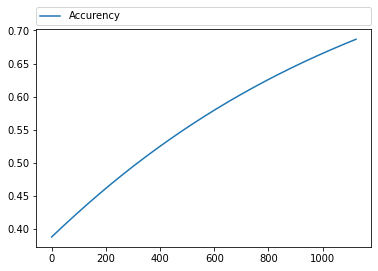

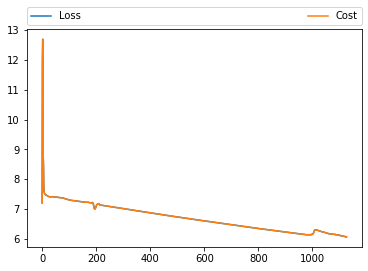

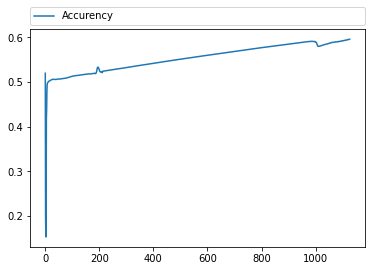

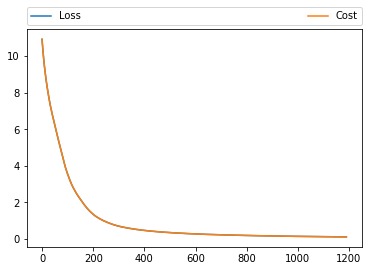

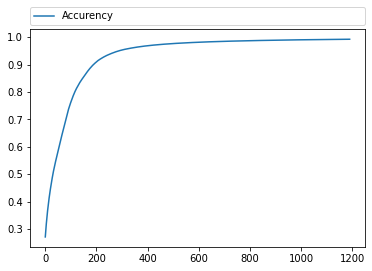

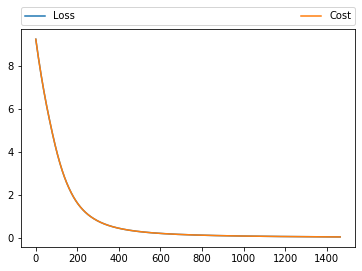

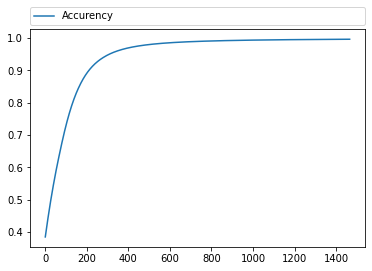

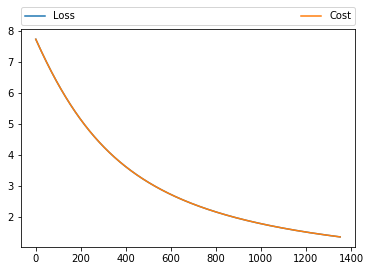

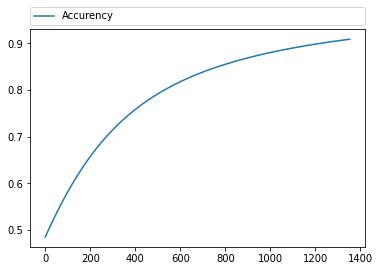

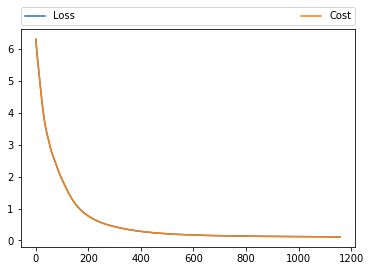

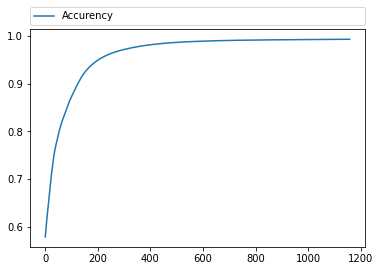

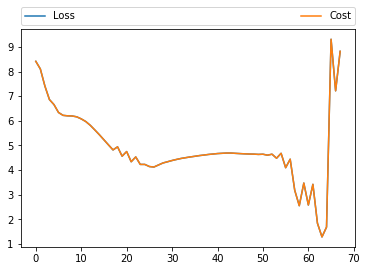

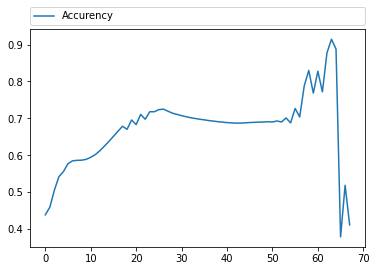

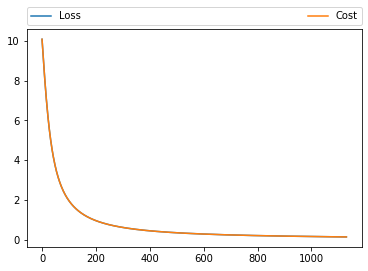

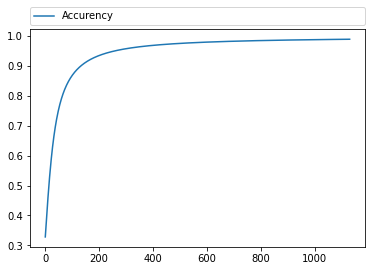

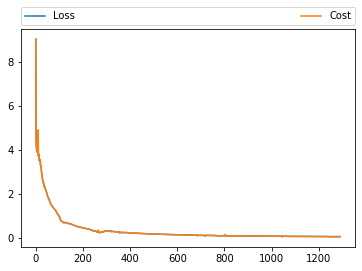

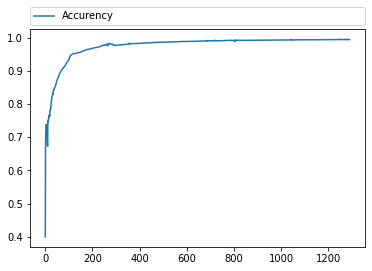

In [88]:
def create_binary_data(size):
    input = []
    output = []
    
    for _ in range(size):
        tmp = []
        for __ in range(16):
            tmp.append((_ >> __) &1)
        input.append(tmp)
        output.append([_])
    return input, output


if __name__ == "__main__":
    
    minput, moutput = create_binary_data(15)
    moutput = np.array(moutput, dtype=np.float64)
    moutput = moutput / 1e+10
    
    meta_simple = MetaNeuralNetwork(
        {
            "size": [16, 1],
            "activation": ["sigmoid", "elu", "swish", "tanh", "relu", "leaky_relu"],
            "min_learning_rate": 1e-2,
            "max_learning_rate": 1e-4,
            "min_epoch": 1000,
            "max_epoch": 1500,
            "derivate_structure": 8,
            "min_layer_derivate": 5,
            "max_layer_derivate": 20,            
            "meta_epoch": 200,
        }
    )
    meta_simple.search(minput, moutput)

###### You can observe new result !